In [76]:
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
#import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import numpy as np

from __future__ import division
import os
import shutil
from subprocess import call
import itertools
import fnmatch
from calendar import monthrange
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import MultiPolygon
import geopandas as gpd
import pandas as pd
import pymannkendall as mk

In [2]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')

In [3]:
from numpy import polyfit, poly1d
from stats import cr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt

import climate_indices as indices
from climate_indices import compute
from climate_indices import utils, indices

In [5]:
import geopandas as gpd
from shapely import wkt

In [6]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
shp_mrb = '/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Mekong_Basin.shp'
shp_lrb = '/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Basin.shp'


In [7]:
ds_pscf = xr.open_mfdataset('pscf_wet/rewpscf/pscf_*.nc')
ds_wpscf = xr.open_mfdataset('pscf_wet/rewpscf/wpscf_*.nc')

In [8]:
df_last = pd.read_csv('fd_wet_traj/merged_lastpoint.csv')

In [211]:
df_last

Unnamed: 0     lat     lon  year
0                 0  72.008 -10.937  2022
1                 1  68.020 -39.701  2022
2                 2  67.387 -20.953  2022
3                 3  38.410  19.654  2022
4                 4  30.350  18.567  2022
...             ...     ...     ...   ...
1058761       10658  26.679  20.276  1960
1058762       10659  20.096  73.012  1960
1058763       10660  21.123  68.798  1960
1058764       10661  15.301  77.189  1960
1058765       10662  15.977  76.220  1960

[1058766 rows x 4 columns]

# wet season

### using SOM for moisture source clustering  # do not run

In [10]:
from SOM_ import SOM as mySOM

In [11]:
last_SOM = np.vstack((np.array(df_last['lon']), np.array(df_last['lat']))).transpose(1,0)

In [12]:
c = []
iner = []
for k in range(0,10):
    num = k+1
    som = mySOM(m=num, n=1, dim=2)
    som.fit(merged_last)
    predictions = som.predict(merged_last)
    cluster = predictions
    names = locals()
    for i in range(0,num):
        names['last_SOM'+str(i)]=[]
        names['index'+str(i)] = np.argwhere(cluster==i)
        names['index'+str(i)] = names['index'+str(i)].reshape(names['index'+str(i)].shape[0])
        for j in range(0,names['index'+str(i)].shape[0]):
            names['last_SOM'+str(i)] = np.append(names['last_SOM'+str(i)],last_SOM[names['index'+str(i)][j]])
        names['last_SOM'+str(i)] = np.array(names['last_SOM'+str(i)]).reshape(names['index'+str(i)].shape[0],2)




    last_som_ = []
    for i in range(0,num):
        last_som_ = np.append(last_som_,np.nanmean(names['last_SOM'+str(i)],axis=0))
    last_som_.reshape(num,2).shape
    som._find_bmu(last_som_.reshape(num,2))
    print(som._inertia_/1000000)



    #fig = plt.figure(figsize=(8, 3), dpi=300)
    #plt.imshow(np.nanmean(gph5000,axis=0),vmax=5800,vmin=5400,cmap='plasma')
    #plt.colorbar()
    c.append(k+1)
    iner.append(som._inertia_/1000000)

NameError: name 'merged_last' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=[4,2.5],dpi=100)
ax.plot(c, iner,c='#c080ff')
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Distortions')

ax.plot(c[3], iner[3], marker='o', markersize=10, color='#fe642e', fillstyle='none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(c)

ax.grid(ls='--',lw=0.1,alpha=0.5,color='k')
plt.show()

#### cluster to 4 group would be the best choice

In [ ]:
som = mySOM(m=4,  # how many cluster you want 
            n=1,
            dim=2)  # the values you want to cluster
som.fit(merged_last)
predictions = som.predict(merged_last)

In [ ]:
df_cluster = pd.read_csv('fd_wet_traj/last_cluster_result.csv')

In [ ]:
cluster4 = np.array(df_cluster['cluster'])

In [ ]:
last_c0 = last_SOM[cluster4==0]
last_c1 = last_SOM[cluster4==1]
last_c2 = last_SOM[cluster4==2]
last_c3 = last_SOM[cluster4==3]

### Water vapor source zoning

2023-12-23  14:45:04 ERROR PROJ: internal_proj_identify: /home/wang-k/.conda/envs/gongguo/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


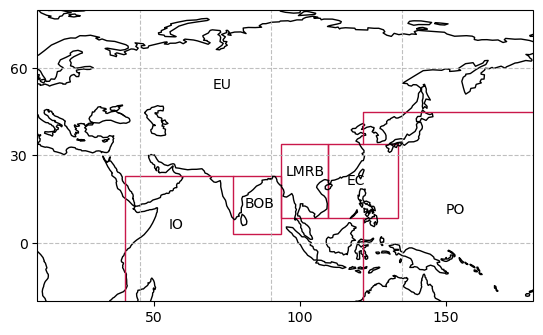

In [9]:
lons, lats = np.meshgrid(ds_wpscf.lon.values, ds_wpscf.lat.values)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, dpi=100)
ax.set_extent([10, 180, -20, 80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(ls='--', alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-60, 91, 30))

ax.add_patch(mpatches.Rectangle(xy=[93.5, 8.5], width=16, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # LMRB
ax.add_patch(mpatches.Rectangle(xy=[109.5, 8.5], width=24, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # SCS
ax.add_patch(mpatches.Rectangle(xy=[77, 3], width=16.5, height=20, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # BOB

line_segments2 = np.array([[77, 23], [40, 23], [40, -45], [121.5, -45], [121.5, -30]]) 
ax.plot(line_segments2[:, 0], line_segments2[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # IO
line_segments1 = np.array([ [121.5, 8.5], [121.5, -30],[190, -30], [190, 45],  [121.5, 45],[121.5, 34],]) 
ax.plot(line_segments1[:, 0], line_segments1[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # PO

# stack_shp(ax, shp, facecolor='none', edgecolor='k', linewidth=0.5, alpha=0.8)
ax.text(95, 23, 'LMRB', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(116, 20, 'EC', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(81, 12, 'BOB', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(55, 5, 'IO', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(70, 53, 'EU', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(150, 10, 'PO', color='black', fontsize=10, transform=ccrs.PlateCarree())


ax.set_xticks([50, 100, 150], crs=ccrs.PlateCarree())
ax.set_yticks([0, 30, 60,], crs=ccrs.PlateCarree())
plt.show()

### PSCF

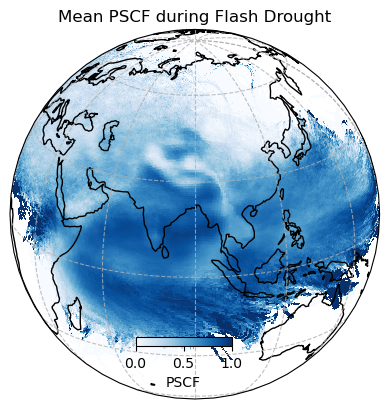

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)
fig, ax = plt.subplots(subplot_kw={'projection': projection},dpi=100)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 30), ylocs=range(-90, 91, 30))
pscf = ds_pscf.mean('time').pscf.plot(transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False)

cax = fig.add_axes([0.42, 0.22, 0.15, 0.02])

cbar = plt.colorbar(pscf , cax=cax, orientation='horizontal',)
cbar.set_label('PSCF')
cbar.set_ticks([0,0.5,1.0])

ax.set_title('Mean PSCF during Flash Drought')
plt.show()

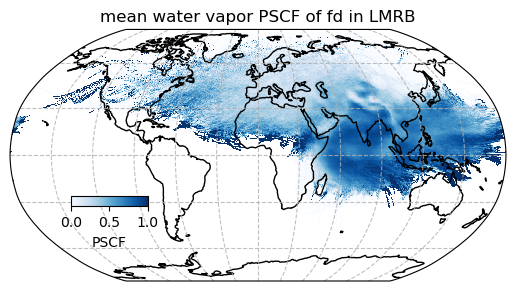

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, dpi=100)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--', alpha=0.8, xlocs=range(-180, 181, 30), ylocs=range(-90, 91, 30))
pscf = ds_pscf.mean('time').pscf.plot(transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False)

cax = fig.add_axes([0.22, 0.39, 0.12, 0.02])
cbar = plt.colorbar(pscf, cax=cax, orientation='horizontal')
cbar.set_label('PSCF')
cbar.set_ticks([0,0.5,1.0])
ax.set_title('mean water vapor PSCF of fd in LMRB')
# stack_shp(ax, shp, facecolor='none', edgecolor='k', linewidth=0.5, alpha=0.8)
plt.show()

### WPSCF

In [12]:
line_segments_po1 = np.array([[121.5, -30], [121.5, 14]])  # PO
line_segments_po2 = np.array([[121.5, 33.5], [121.5, 45]])  # PO
line_segments_po3 = np.array([[121.5, 45], [190, 45]])  # PO
line_segments_po4 = np.array([[190, 45], [190, -30]])  # PO
line_segments_po5 = np.array([[121.5, -30], [190, -30]]) # PO

line_segments_io1 = np.array([[77, 23], [40, 23]])  # IO  
line_segments_io2 = np.array([[40, 23], [40, -45]])  # IO  
line_segments_io3 = np.array([[40, -45], [121.5, -45]])  # IO  
line_segments_io4 = np.array([[121.5, -45], [121.5, -30]])  # IO  

line_segments_bob1 = np.array([[77, 3], [93.5, 3]])  # BOB  
line_segments_bob2 = np.array([[77, 3], [77, 23]])  # BOB  
line_segments_bob3 = np.array([[93.5, 3], [93.5, 23]])  # BOB  
line_segments_bob4 = np.array([[77, 23], [93.5, 23]])  # BOB  

line_segments_scs1 = np.array([[109.5, 14], [133.5, 14]])  # SCS 
line_segments_scs2 = np.array([[109.5, 14], [109.5, 33.5]])  # SCS 
line_segments_scs3 = np.array([[133.5, 14], [133.5, 33.5]])  # SCS 
line_segments_scs4 = np.array([[109.5, 33.5], [133.5, 33.5]])  # SCS 

line_segments_lmrb1 = np.array([[93.5, 8.5], [109.5, 8.5]])  # LMRB 
line_segments_lmrb2 = np.array([[93.5, 8.5], [93.5, 33.5]])  # LMRB
line_segments_lmrb3 = np.array([[109.5, 8.5], [109.5, 33.5]])  # LMRB
line_segments_lmrb4 = np.array([[93.5, 33.5], [109.5, 33.5]])  # LMRB 

line_segments = [line_segments_po1, line_segments_po2, line_segments_po3, line_segments_po4, line_segments_po5,
                 line_segments_io1, line_segments_io2, line_segments_io3,  line_segments_io4,
                 line_segments_bob1, line_segments_bob2, line_segments_bob3, line_segments_bob4,
                 line_segments_scs1, line_segments_scs2, line_segments_scs3, line_segments_scs4,
                 line_segments_lmrb1, line_segments_lmrb2, line_segments_lmrb3, line_segments_lmrb4]

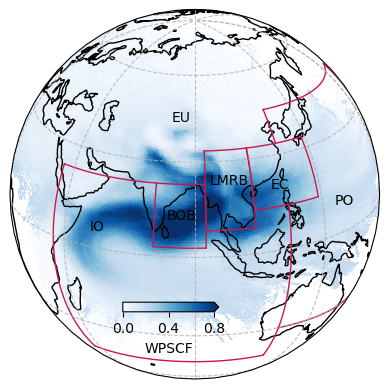

In [92]:
projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)
fig, ax = plt.subplots(subplot_kw={'projection': projection},dpi=100)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
wpscf = ds_wpscf.mean('time').wpscf.plot(transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False,vmin=0,vmax=0.8)

cax = fig.add_axes([0.4, 0.25, 0.15, 0.02])
cbar = plt.colorbar(wpscf, cax=cax, orientation='horizontal', extend='max')
cbar.set_label('WPSCF')
cbar.set_ticks([0,0.4,0.8])


for line_segment in line_segments:
    lon, lat = line_segment.T
    lon_interp = np.linspace(lon[0], lon[1], 100)
    lat_interp = np.linspace(lat[0], lat[1], 100)

    lon_interp, lat_interp = projection.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)[..., :2].T
    ax.plot(lon_interp, lat_interp, color='#c9184a', linewidth=1, transform=projection)

ax.text(95, 23, 'LMRB', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(116, 20, 'EC', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(81, 12, 'BOB', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(55, 5, 'IO', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(80, 43, 'EU', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(140, 10, 'PO', color='black', fontsize=10, transform=ccrs.PlateCarree())

# ax.set_title('Mean WPSCF during Flash Drought')
plt.show()

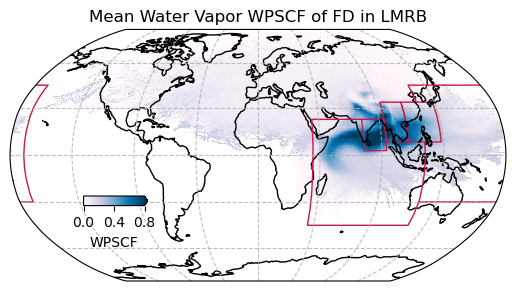

In [14]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, dpi=100)

ax.set_global()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
ax.coastlines()

wpscf = ds_wpscf.mean('time').wpscf.plot(transform=ccrs.PlateCarree(), cmap='PuBu', add_colorbar=False,vmin=0,vmax=0.8)

cax = fig.add_axes([0.24, 0.39, 0.10, 0.02]) 
cbar = plt.colorbar(wpscf, cax=cax, orientation='horizontal', extend='max')
cbar.set_label('WPSCF')
cbar.set_ticks([0,0.4,0.8])

ax.add_patch(mpatches.Rectangle(xy=[93.5, 8.5], width=16, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # LMRB
ax.add_patch(mpatches.Rectangle(xy=[109.5, 8.5], width=24, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # SCS
ax.add_patch(mpatches.Rectangle(xy=[77, 3], width=16.5, height=20, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # BOB

line_segments2 = np.array([[77, 23], [40, 23], [40, -45], [121.5, -45], [121.5, -30]]) 
ax.plot(line_segments2[:, 0], line_segments2[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # IO
line_segments1 = np.array([ [121.5, 8.5], [121.5, -30],[190, -30], [190, 45],  [121.5, 45],[121.5, 34],]) 
ax.plot(line_segments1[:, 0], line_segments1[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # PO

ax.set_title('Mean Water Vapor WPSCF of FD in LMRB')

plt.show()

In [15]:
LMRB_wpscf = ds_wpscf.sel(lon=slice(93.5, 109.5), lat=slice(25.5, 8.5))
BOB_wpscf = ds_wpscf.sel(lon=slice(77, 93.5), lat=slice(23, 3))
SCS_wpscf = ds_wpscf.sel(lon=slice(109.5, 133.5), lat=slice(34, 8.5))

region1_PO = ds_wpscf.sel(lon=slice(121.5, 133.5), lat=slice(45, 34))
region2_PO = ds_wpscf.sel(lon=slice(121.5, 133.5), lat=slice(8.5, -30))
region3_PO = ds_wpscf.sel(lon=slice(133.5, 180), lat=slice(45, -30))
region4_PO = ds_wpscf.sel(lon=slice(-180, -170), lat=slice(45, -30))
PO_wpscf = xr.concat([region1_PO, region2_PO,], dim="new_dim")

region1_IO = ds_wpscf.sel(lon=slice(40, 77), lat=slice(23, -45))
region2_IO = ds_wpscf.sel(lon=slice(77, 121.5), lat=slice(3, -45))
region3_IO = ds_wpscf.sel(lon=slice(93.5, 109.5), lat=slice(8.5, 3))
IO_wpscf = xr.concat([region1_IO, region2_IO, region3_IO], dim="new_dim")

region1_EU = ds_wpscf.sel(lon=slice(40, 93.5), lat=slice(90, 23))
region2_EU = ds_wpscf.sel(lon=slice(93.5, 109.5), lat=slice(90, 25.5))
region3_EU = ds_wpscf.sel(lon=slice(109.5, 121.5), lat=slice(90, 28))
region4_EU = ds_wpscf.sel(lon=slice(121.5, 190), lat=slice(90, 45))
region5_EU = ds_wpscf.sel(lon=slice(-170, 40), lat=slice(90, -45))
EU_wpscf = xr.concat([region1_EU, region2_EU, region3_EU, region4_EU, region5_EU], dim="new_dim")

In [16]:
arr_LMRB_wpscf = LMRB_wpscf.wpscf.values
arr_BOB_wpscf = BOB_wpscf.wpscf.values
arr_SCS_wpscf = SCS_wpscf.wpscf.values
arr_PO_wpscf = PO_wpscf.wpscf.values
arr_IO_wpscf = IO_wpscf.wpscf.values
arr_EU_wpscf = EU_wpscf.wpscf.values
arr_tot_wpscf = ds_wpscf.wpscf.values

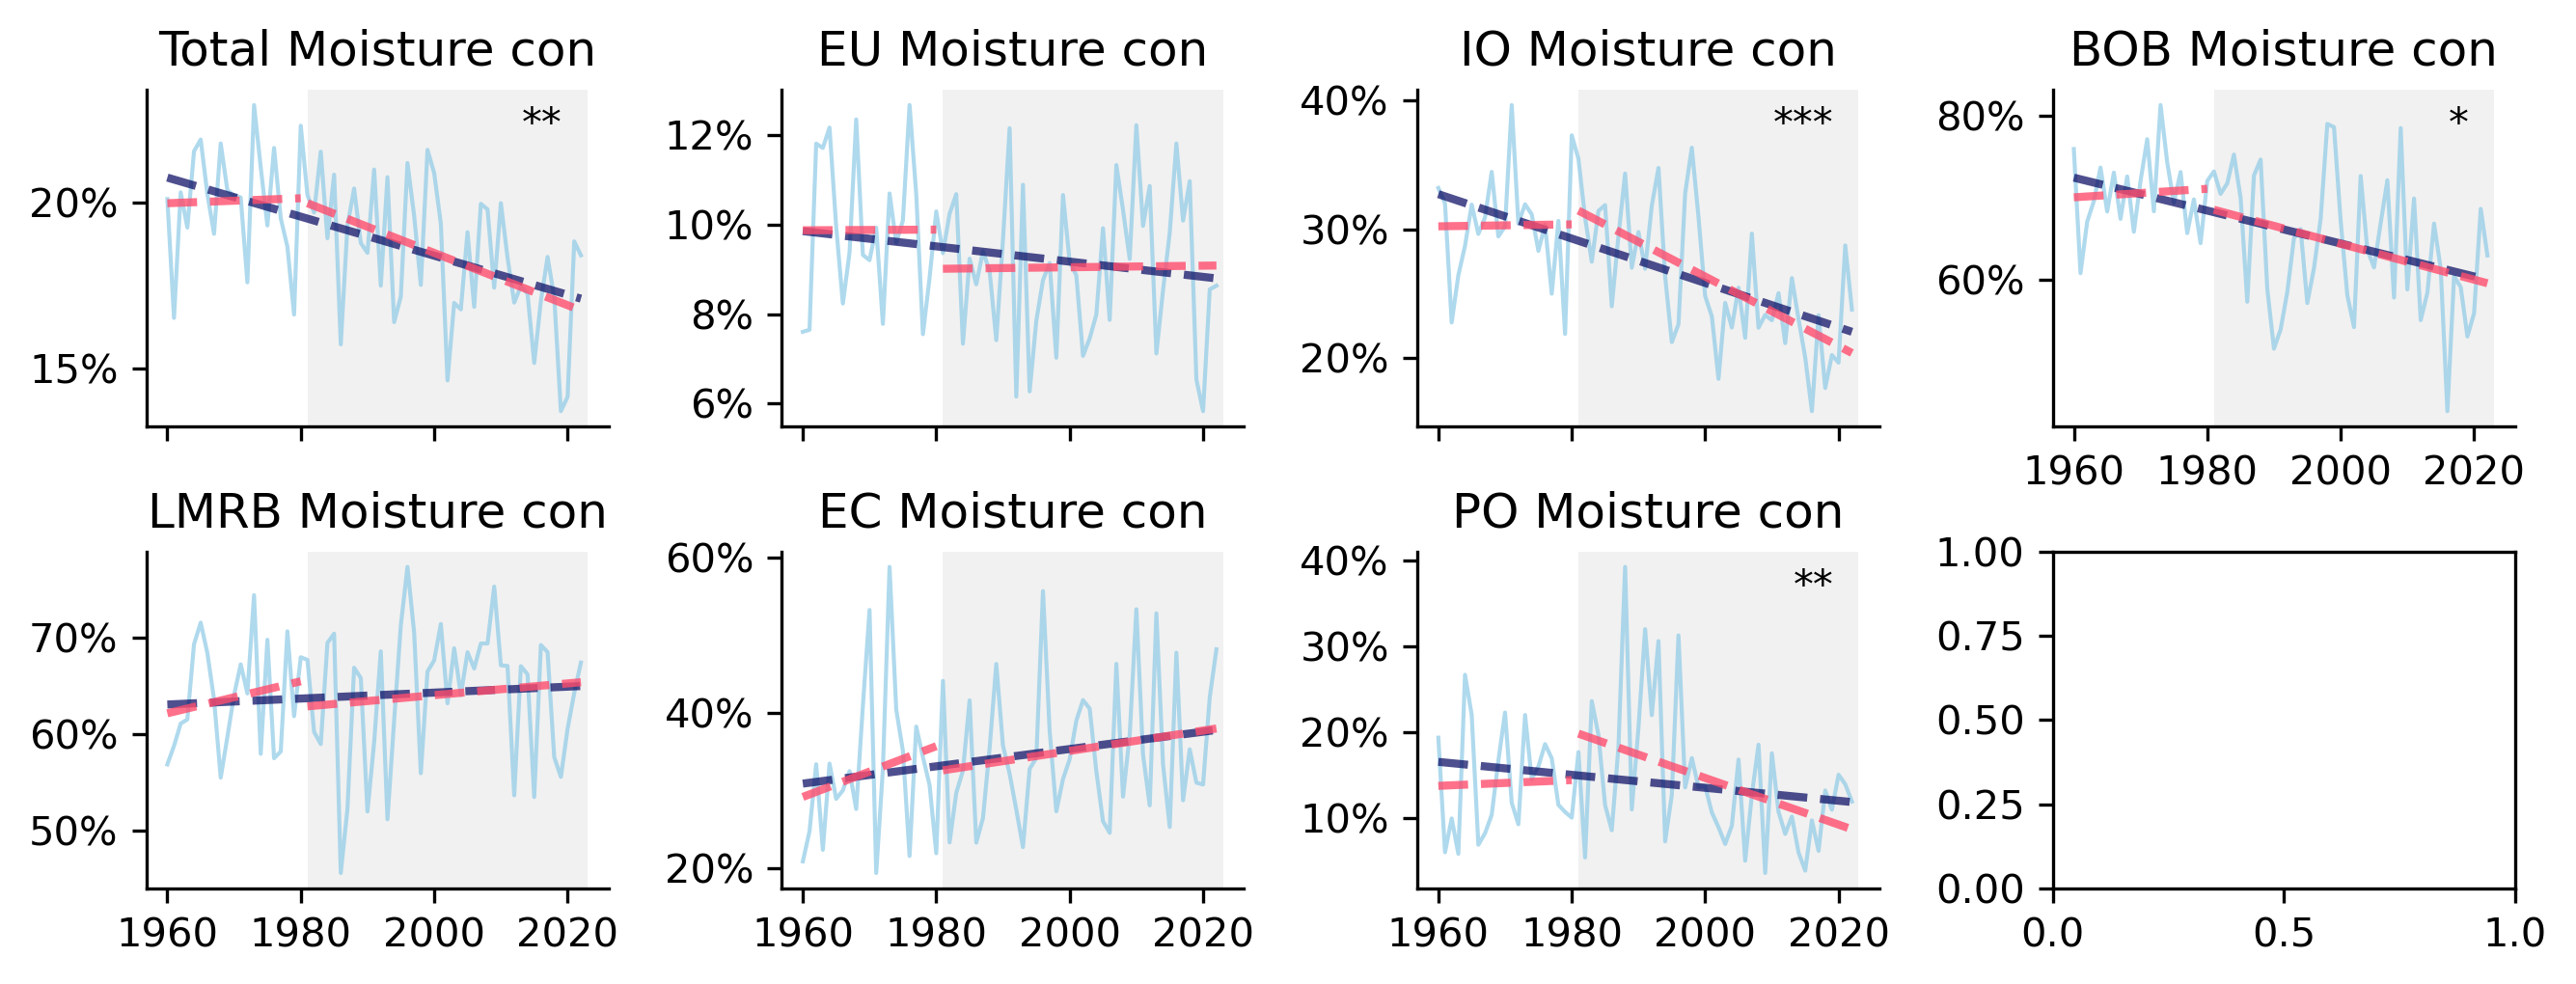

In [80]:

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
varia3 = [np.nanmean(arr_tot_wpscf, axis=(1, 2)),
          np.nanmean(arr_EU_wpscf, axis=(0, 2, 3)), np.nanmean(arr_IO_wpscf, axis=(0, 2, 3)),
          np.nanmean(arr_BOB_wpscf, axis=(1, 2)), np.nanmean(arr_LMRB_wpscf, axis=(1, 2)),
          np.nanmean(arr_SCS_wpscf, axis=(1, 2)), np.nanmean(arr_PO_wpscf, axis=(0, 2, 3)),]
namess = ['Total Moisture con','EU Moisture con', 'IO Moisture con', 'BOB Moisture con',
          'LMRB Moisture con', 'EC Moisture con', 'PO Moisture con']
x = np.arange(63)
x1 = np.arange(0,21)
x2 = np.arange(21,63)
fig, axes = plt.subplots(2, 4, figsize=(9, 3.5), dpi=300)

for i, ax in enumerate(axes.flat[0:7]):
    slope, intercept, r_value, p_value, std_err = linregress(x, varia3[i])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, varia3[i][0:21])
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, varia3[i][21:63])
    ax.plot(varia3[i],color="#8ecae6",lw=1,alpha=0.7)
    ax.set_title(namess[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 20, 40, 60])  
    ax.set_xticklabels(['1960',  '1980', '2000', '2020'])  
    ax.plot(x, intercept + slope * x, color='#03045e', linestyle='--',lw= 2,alpha=0.7)
    ax.plot(x1, intercept1 + slope1 * x1, color='#ff4d6d', linestyle='--',lw= 2,alpha=0.8)
    ax.plot(x2, intercept2 + slope2 * x2, color='#ff4d6d', linestyle='--',lw= 2,alpha=0.8)
    ax.axvspan(21, 63, facecolor='lightgray', alpha=0.3)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1,decimals=0))
    ax.xaxis.set_ticks_position('bottom')  
    ax.yaxis.set_ticks_position('left') 
    
    if 0.01 < p_value2 < 0.05:
        ax.text(0.90, 0.95, '*', ha='right', va='top', transform=ax.transAxes)
    if 0.001 < p_value2 < 0.01:
        ax.text(0.90, 0.95, '**', ha='right', va='top', transform=ax.transAxes)
    if p_value2 < 0.001:
        ax.text(0.90, 0.95, '***', ha='right', va='top', transform=ax.transAxes)
    if i == 0:
        ax.set_xticklabels([])
    if i == 1:
        ax.set_xticklabels([])
    if i == 2:
        ax.set_xticklabels([])
        
plt.tight_layout()
plt.savefig('Fig_save/mois_cont_trend_time.pdf')
plt.show()

In [82]:
names = locals()
namess6 = ['moisture_con']

wpscf_ = ds_wpscf.wpscf.values

for k in range(0,1):
    names[namess6[k]+'_p'], names[namess6[k]+'_co']= [],[]
    for i in range(0,361):
        for j in range(0,721):
            array = wpscf_[21:63, i, j]
            if np.isnan(np.nanmean(array)):
                names[namess6[k]+'_co'].append(np.nan)
                names[namess6[k]+'_p'].append(np.nan)
            elif array[~np.isnan(array)].shape[0] < 20:
                names[namess6[k]+'_co'].append(np.nan)
                names[namess6[k]+'_p'].append(np.nan)
            else :
                valid_indices = ~np.isnan(array)
                x = np.arange(wpscf_[21:63, i, j].shape[0])
                x_valid = x[valid_indices]
                arr_valid = array[valid_indices]
                slope, intercept, r_value, p_value, std_err = linregress(x_valid, arr_valid)
                names[namess6[k]+'_co'].append(slope)

                if p_value < 0.05:
                    names[namess6[k]+'_p'].append(1)
                else:
                    names[namess6[k]+'_p'].append(np.nan)
                
    names[namess6[k]+'_p'] = np.array(names[namess6[k]+'_p']).reshape(361,721)
    names[namess6[k]+'_co'] = np.array(names[namess6[k]+'_co']).reshape(361,721)
    
     ################################################################################

clist5=['#035a96','#1079c3','#3d9fee','#ffffff','#ffffff','#ff6d6d','#f26ca7','#920efc']
cmap5 = LinearSegmentedColormap.from_list('chaos',clist5)

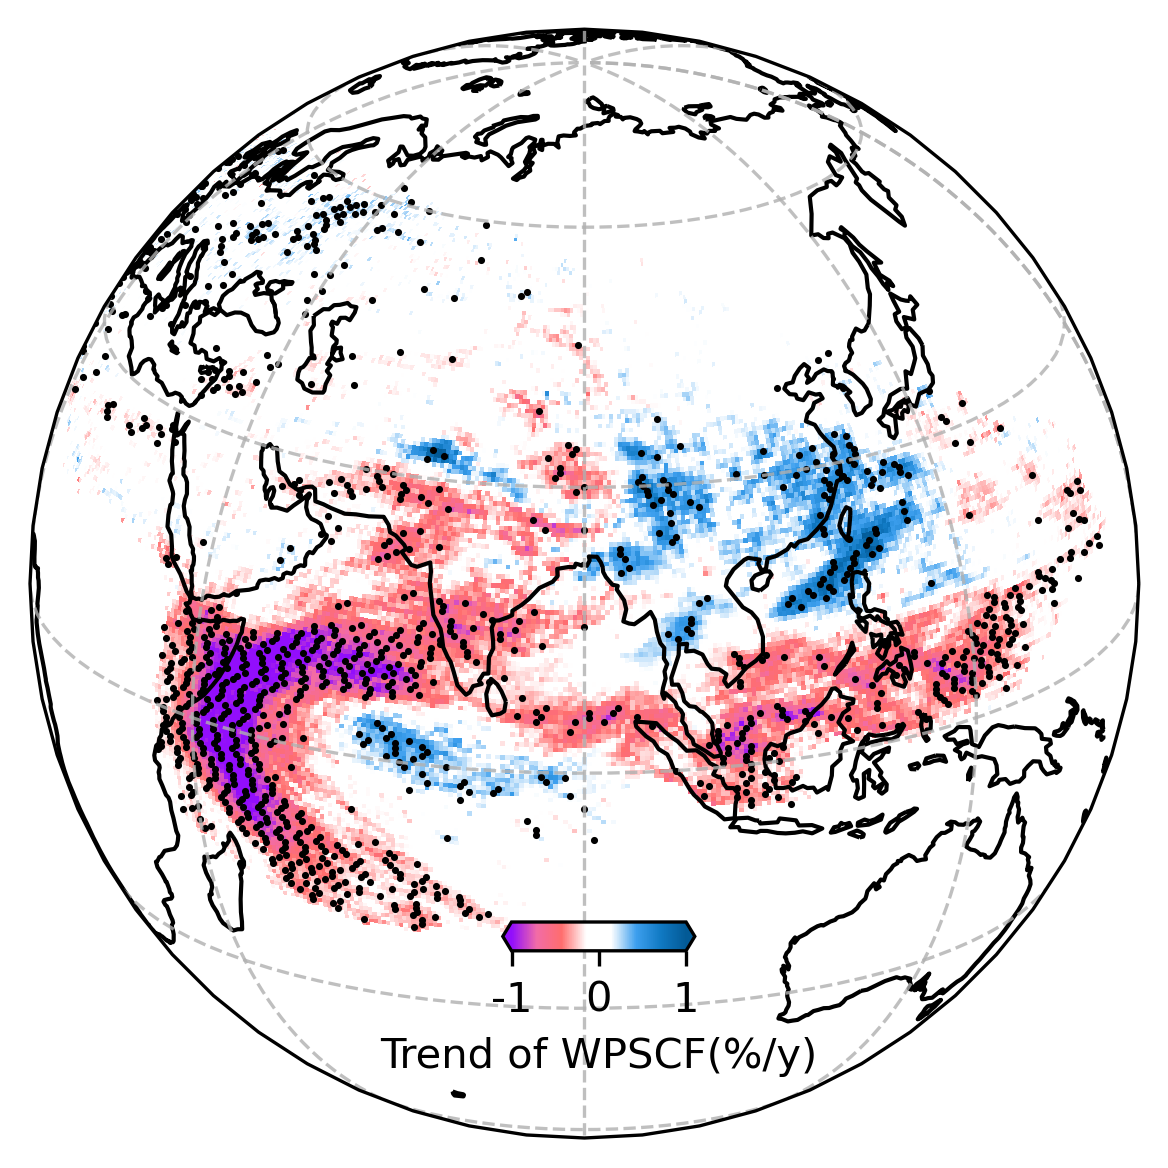

In [89]:
moisture_con_co[np.isnan(moisture_con_co)] = 0

projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)
fig, ax = plt.subplots(subplot_kw={'projection': projection},dpi=300)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))

im = ax.pcolormesh(ds_wpscf.lon, ds_wpscf.lat, moisture_con_co, 
                   transform=ccrs.PlateCarree(), cmap=cmap5.reversed(),vmin=-0.01,vmax=0.01)

cax = fig.add_axes([0.47, 0.24, 0.1, 0.02])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', extend='both')
cbar.set_label('Trend of WPSCF(%/y)')
cbar.set_ticks([-0.01,0,0.01])
cbar.set_ticklabels(['-1','0','1'])

lon_grid, lat_grid = np.meshgrid(ds_wpscf.lon, ds_wpscf.lat)
lon_points = lon_grid.flatten()
lat_points = lat_grid.flatten()
moisture_values = moisture_con_p.flatten()
sc = ax.scatter(lon_points[moisture_values == 1][::5], lat_points[moisture_values == 1][::5],
                color='k', s=0.5, marker='o', transform=ccrs.PlateCarree())

plt.savefig('Fig_save/mois_cont_trend_spa.pdf')
# for line_segment in line_segments:
#     lon, lat = line_segment.T
#     lon_interp = np.linspace(lon[0], lon[1], 100)
#     lat_interp = np.linspace(lat[0], lat[1], 100)

#     lon_interp, lat_interp = projection.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)[..., :2].T
#     ax.plot(lon_interp, lat_interp, color='#c9184a', linewidth=1, transform=projection)

# ax.set_title('WPSCF Trend during Flash Drought')
plt.show()

# Water Vapor Transport Initialization

In [192]:
ds_wpscf_lag2 = xr.open_mfdataset('pscf_wet/lag-2/wpscf_*.nc')
ds_wpscf_lag1 = xr.open_mfdataset('pscf_wet/lag-1/wpscf_*.nc')
ds_wpscf_onset = xr.open_mfdataset('pscf_wet/onset/wpscf_*.nc')
ds_wpscf_lag11 = xr.open_mfdataset('pscf_wet/lag+1/wpscf_*.nc')

In [94]:
clist6=['#5f0bb3','#0969ad','#3d9fee','#ffffff']
cmap6 = LinearSegmentedColormap.from_list('chaos',clist6)

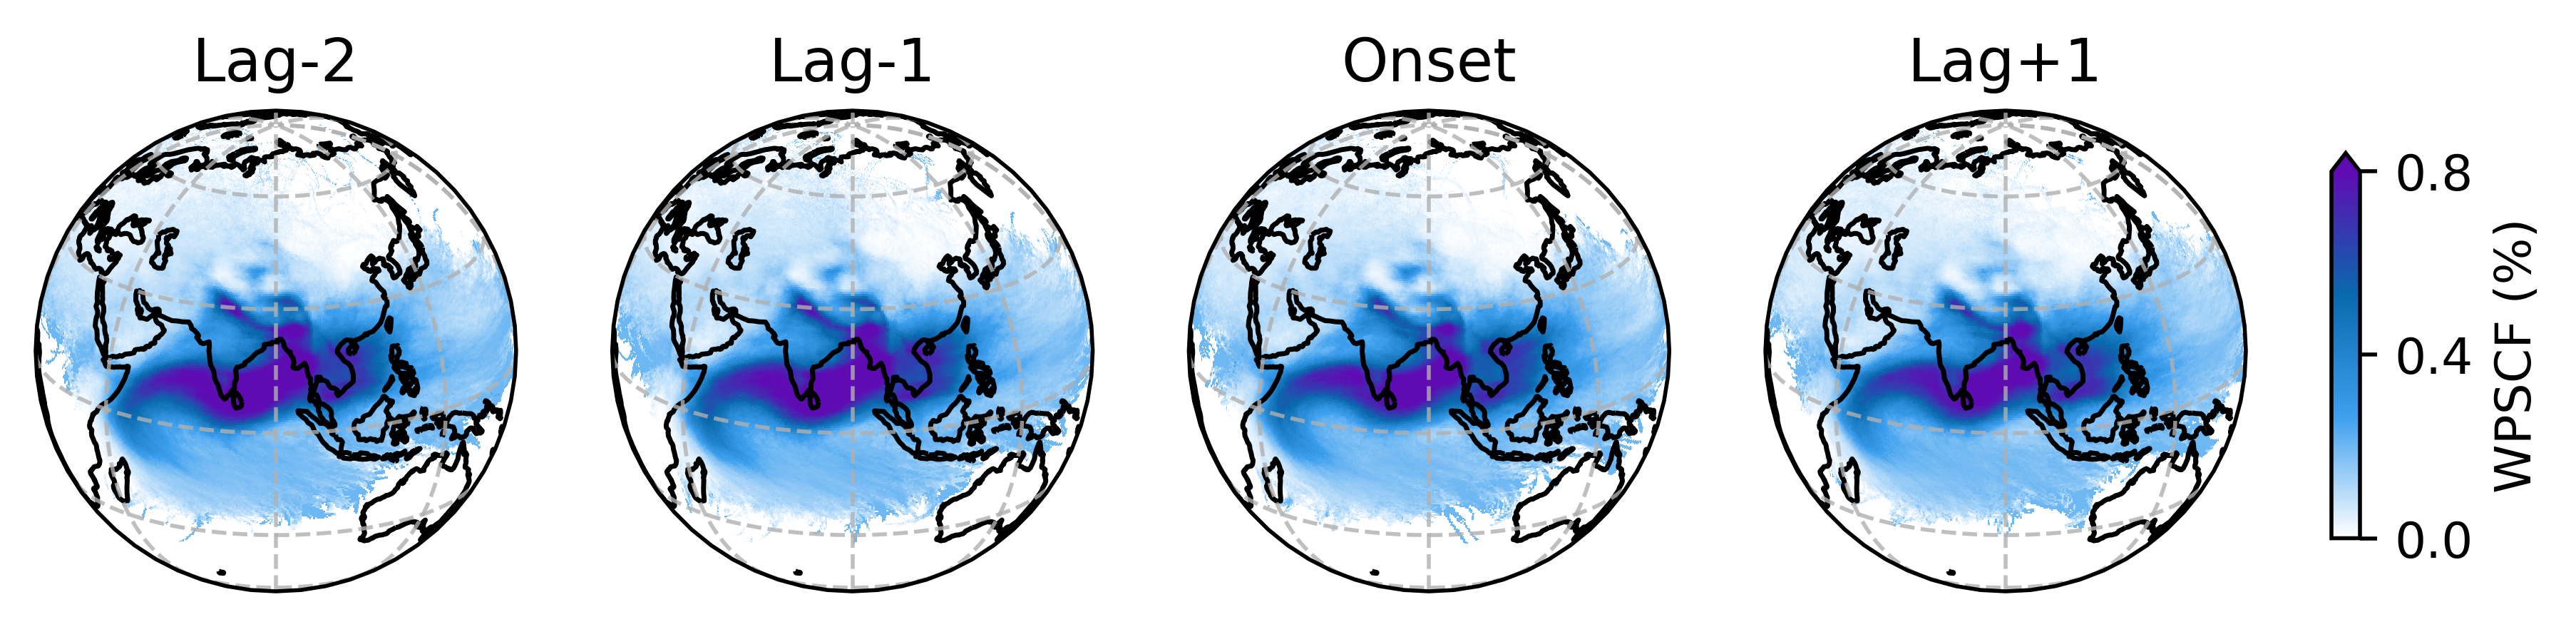

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have four datasets: ds_wpscf_lag2, ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11

# Assuming ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11 have the same coordinates, so using ds_wpscf_lag1 as an example
projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)

fig, ax = plt.subplots(1, 4, figsize=(8, 3), subplot_kw={'projection': projection}, dpi=500)

datasets = [ds_wpscf_lag2, ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11]
titles = ['Lag-2', 'Lag-1', 'Onset', 'Lag+1']

for i in range(4):
    ax[i].set_global()
    ax[i].coastlines()
    ax[i].gridlines(ls='--', alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
    wpscf = datasets[i].mean('time').wpscf.plot(
        ax=ax[i], transform=ccrs.PlateCarree(), cmap=cmap6.reversed(), add_colorbar=False, vmin=0, vmax=0.8
    )
    ax[i].set_title(titles[i])

cax = fig.add_axes([0.93, 0.32, 0.01, 0.36])
cbar = plt.colorbar(wpscf, cax=cax, orientation='vertical', extend='max')
cbar.set_label('WPSCF (%)')
cbar.set_ticks([0, 0.4, 0.8])
plt.savefig('Fig_save/mois_cont_ance.pdf')
plt.show()


2023-12-23  14:20:26 ERROR PROJ: internal_proj_identify: /home/wang-k/.conda/envs/gongguo/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


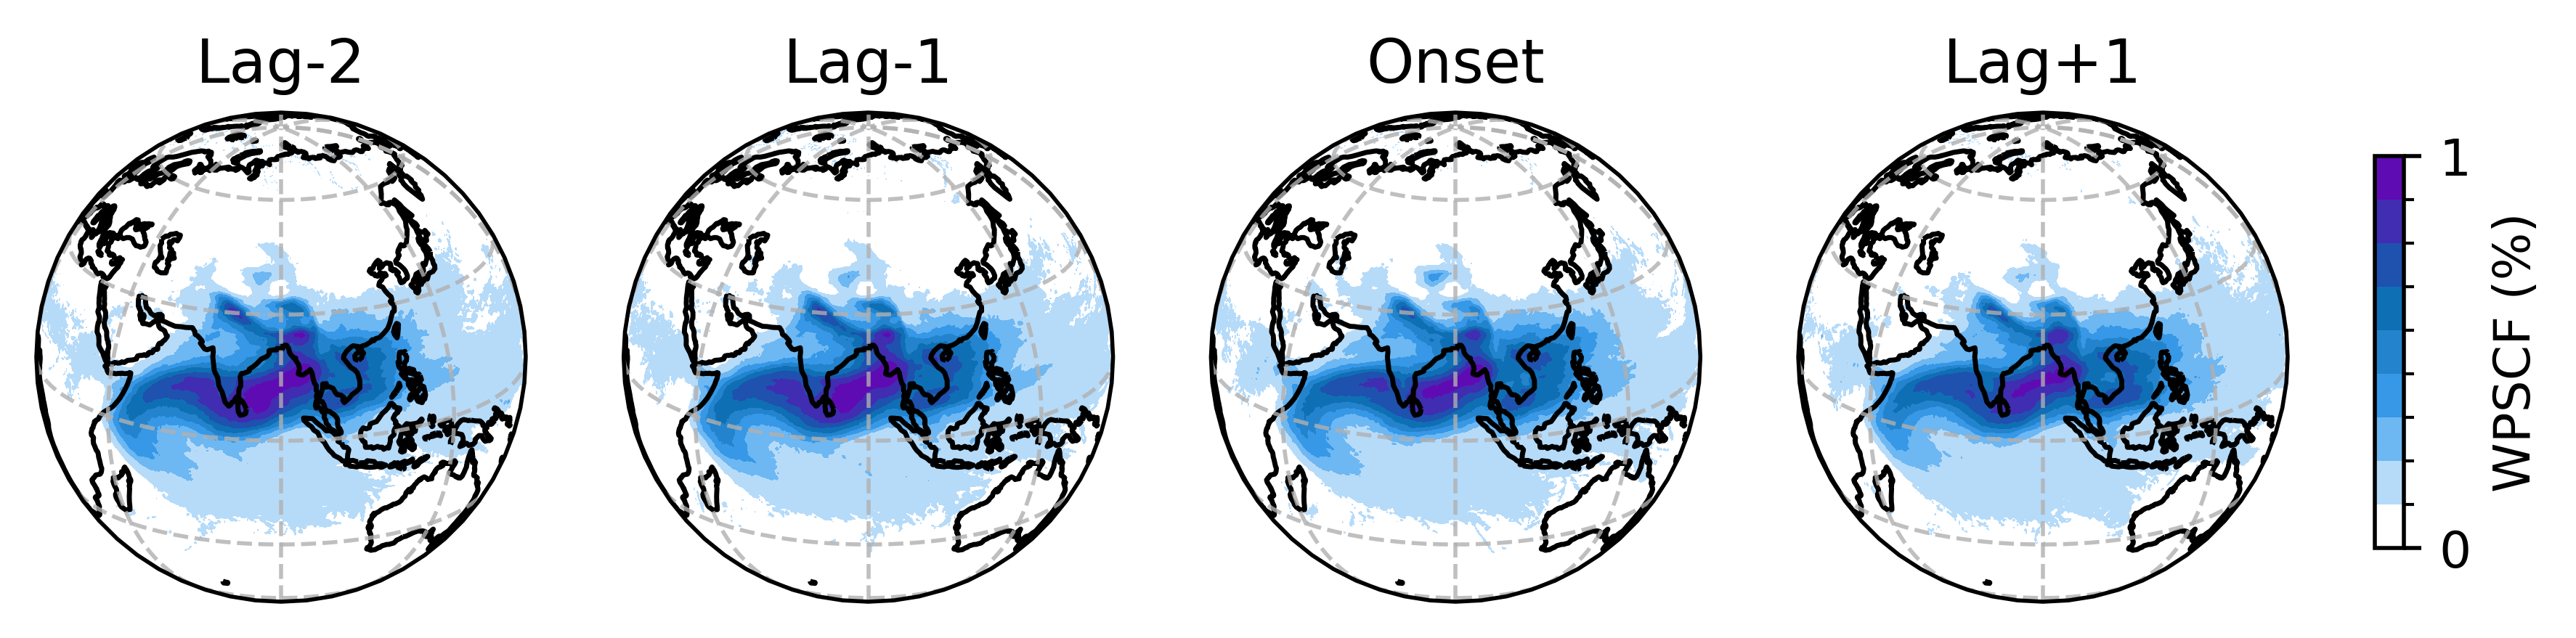

In [195]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have four datasets: ds_wpscf_lag2, ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11

# Assuming ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11 have the same coordinates, so using ds_wpscf_lag1 as an example
projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)

fig, ax = plt.subplots(1, 4, figsize=(8, 3), subplot_kw={'projection': projection}, dpi=500)

datasets = [ds_wpscf_lag2, ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11]
titles = ['Lag-2', 'Lag-1', 'Onset', 'Lag+1']

for i in range(4):
    ax[i].set_global()
    ax[i].coastlines()
    ax[i].gridlines(ls='--', alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
    wpscf = datasets[i].mean('time').wpscf.plot.contourf(
        ax=ax[i], transform=ccrs.PlateCarree(), cmap=cmap6.reversed(), add_colorbar=False, levels=10, vmin=0, vmax=1
    )
    ax[i].set_title(titles[i])

cax = fig.add_axes([0.93, 0.32, 0.01, 0.36])
cbar = plt.colorbar(wpscf, cax=cax, orientation='vertical',)
cbar.set_label('WPSCF (%)')
cbar.set_ticks([0,1])

plt.show()

In [204]:
names = locals()
namm = ['lag2', 'lag1', 'onset', 'lag11']
for ds,nam in zip(datasets,namm):
    LMRB_wpscf = ds.sel(lon=slice(93.5, 109.5), lat=slice(25.5, 8.5))
    BOB_wpscf = ds.sel(lon=slice(77, 93.5), lat=slice(23, 3))
    SCS_wpscf = ds.sel(lon=slice(109.5, 133.5), lat=slice(34, 8.5))
    
    region1_PO = ds.sel(lon=slice(121.5, 133.5), lat=slice(45, 34))
    region2_PO = ds.sel(lon=slice(121.5, 133.5), lat=slice(8.5, -30))
    region3_PO = ds.sel(lon=slice(133.5, 180), lat=slice(45, -30))
    region4_PO = ds.sel(lon=slice(-180, -170), lat=slice(45, -30))
    PO_wpscf = xr.concat([region1_PO, region2_PO,], dim="new_dim")
    
    region1_IO = ds.sel(lon=slice(40, 77), lat=slice(23, -45))
    region2_IO = ds.sel(lon=slice(77, 121.5), lat=slice(3, -45))
    region3_IO = ds.sel(lon=slice(93.5, 109.5), lat=slice(8.5, 3))
    IO_wpscf = xr.concat([region1_IO, region2_IO, region3_IO], dim="new_dim")
    
    region1_EU = ds.sel(lon=slice(40, 93.5), lat=slice(90, 23))
    region2_EU = ds.sel(lon=slice(93.5, 109.5), lat=slice(90, 25.5))
    region3_EU = ds.sel(lon=slice(109.5, 121.5), lat=slice(90, 28))
    region4_EU = ds.sel(lon=slice(121.5, 190), lat=slice(90, 45))
    region5_EU = ds.sel(lon=slice(-170, 40), lat=slice(90, -45))
    EU_wpscf = xr.concat([region1_EU, region2_EU, region3_EU, region4_EU, region5_EU], dim="new_dim")

    tot_wpscf = ds
    
    names['arr_LMRB_wpscf_'+nam] = np.nanmean(LMRB_wpscf.wpscf.values,axis=(1,2))
    names['arr_BOB_wpscf_'+nam] = np.nanmean(BOB_wpscf.wpscf.values,axis=(1,2))
    names['arr_SCS_wpscf_'+nam] = np.nanmean(SCS_wpscf.wpscf.values,axis=(1,2))
    names['arr_PO_wpscf_'+nam] = np.nanmean(PO_wpscf.wpscf.values,axis=(0,2,3))
    names['arr_IO_wpscf_'+nam] = np.nanmean(IO_wpscf.wpscf.values,axis=(0,2,3))
    names['arr_EU_wpscf_'+nam] = np.nanmean(EU_wpscf.wpscf.values,axis=(0,2,3))
    names['arr_tot_wpscf_'+nam] = names['arr_LMRB_wpscf_'+nam]+names['arr_BOB_wpscf_'+nam]+names['arr_SCS_wpscf_'+nam]+names['arr_PO_wpscf_'+nam]+names['arr_IO_wpscf_'+nam]+names['arr_EU_wpscf_'+nam]


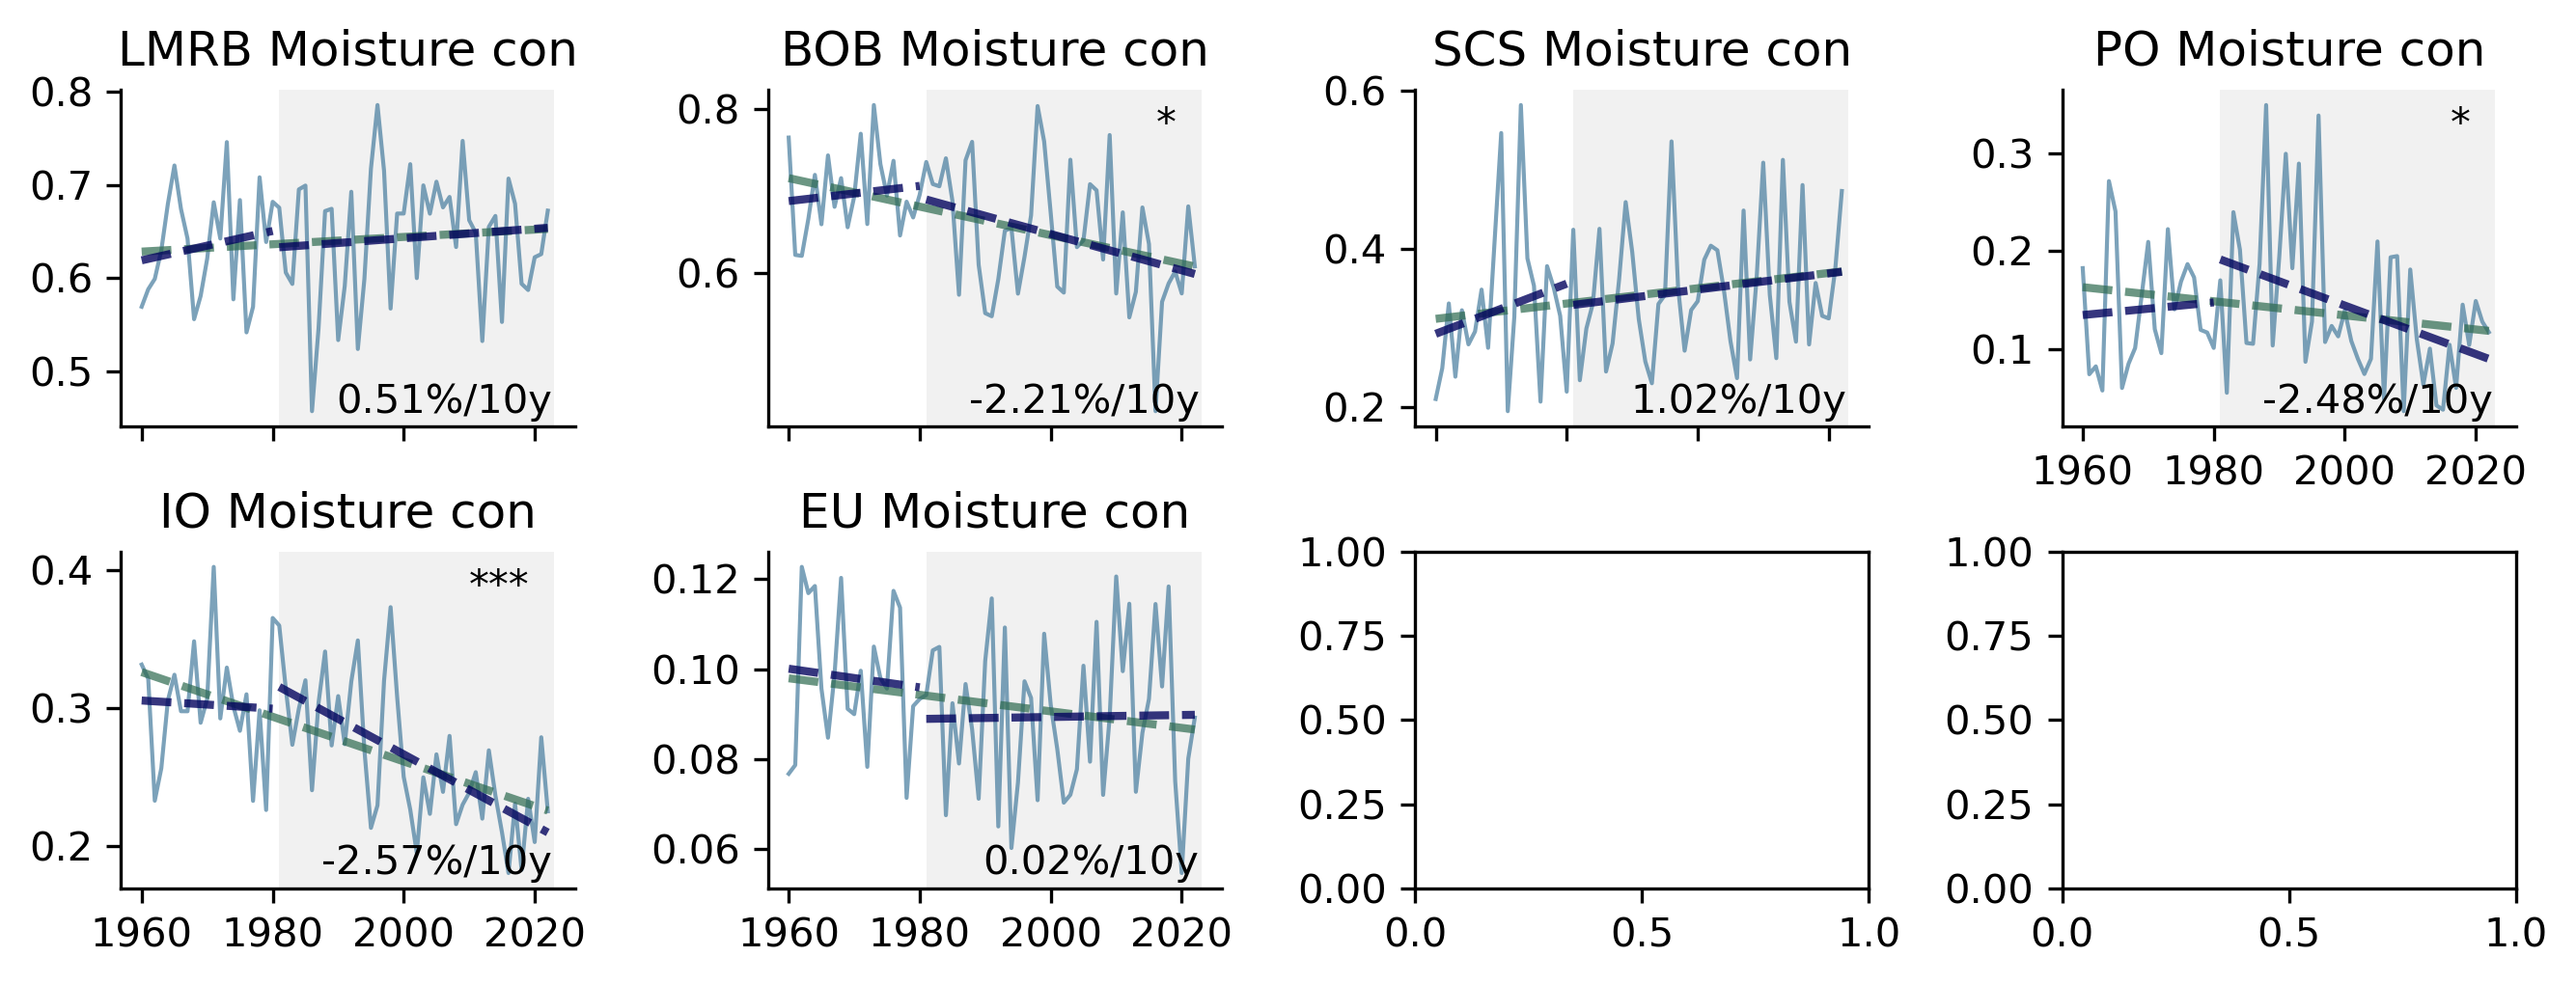

In [207]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
varia4 = [arr_LMRB_wpscf_onset,
          arr_BOB_wpscf_onset, 
          arr_SCS_wpscf_onset,
         arr_PO_wpscf_onset,
         arr_IO_wpscf_onset,
         arr_EU_wpscf_onset,]
namess = ['LMRB Moisture con','BOB Moisture con', 'SCS Moisture con', 'PO Moisture con',
          'IO Moisture con', 'EU Moisture con',]
x = np.arange(63)
x1 = np.arange(0,21)
x2 = np.arange(21,63)
fig, axes = plt.subplots(2, 4, figsize=(9, 3.5), dpi=300)

for i, ax in enumerate(axes.flat[0:6]):
    slope, intercept, r_value, p_value, std_err = linregress(x, varia4[i])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, varia4[i][0:21])
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, varia4[i][21:63])
    ax.plot(varia4[i],color="#457b9d",lw=1,alpha=0.7)
    ax.set_title(namess[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 20, 40, 60])  
    ax.set_xticklabels(['1960',  '1980', '2000', '2020'])  
    ax.plot(x, intercept + slope * x, color='#2d6a4f', linestyle='--',lw= 2,alpha=0.7)
    ax.plot(x1, intercept1 + slope1 * x1, color='#03045e', linestyle='--',lw= 2,alpha=0.8)
    ax.plot(x2, intercept2 + slope2 * x2, color='#03045e', linestyle='--',lw= 2,alpha=0.8)
    ax.axvspan(21, 63, facecolor='lightgray', alpha=0.3)
    ax.text(0.95, 0.13, f'{slope2*1000:.2f}%/10y', ha='right', va='top', transform=ax.transAxes)
    ax.xaxis.set_ticks_position('bottom')  
    ax.yaxis.set_ticks_position('left') 

    if 0.01 < p_value2 < 0.05:
        ax.text(0.90, 0.95, '*', ha='right', va='top', transform=ax.transAxes)
    if 0.001 < p_value2 < 0.01:
        ax.text(0.90, 0.95, '**', ha='right', va='top', transform=ax.transAxes)
    if p_value2 < 0.001:
        ax.text(0.90, 0.95, '***', ha='right', va='top', transform=ax.transAxes)
    if i == 0:
        ax.set_xticklabels([])
    if i == 1:
        ax.set_xticklabels([])
    if i == 2:
        ax.set_xticklabels([])
        
plt.tight_layout()
plt.savefig('Fig_save/mois_cont_trend_time.pdf')
plt.show()

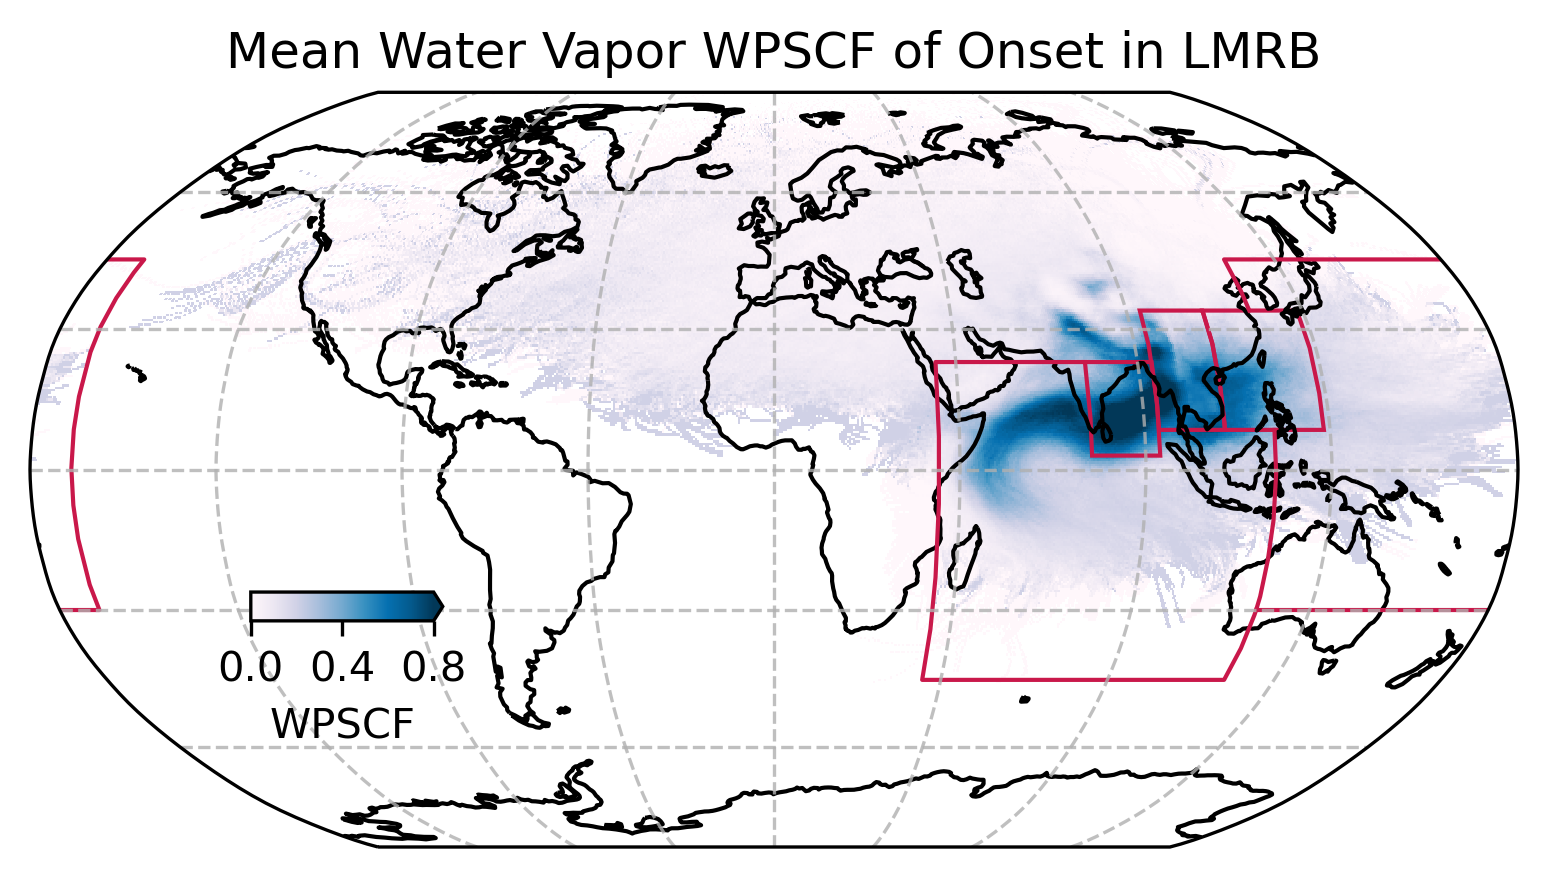

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, dpi=300)

ax.set_global()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
ax.coastlines()

wpscf = ds_wpscf_onset.mean('time').wpscf.plot(transform=ccrs.PlateCarree(), cmap='PuBu', add_colorbar=False,vmin=0,vmax=0.8)

cax = fig.add_axes([0.24, 0.39, 0.10, 0.02]) 
cbar = plt.colorbar(wpscf, cax=cax, orientation='horizontal', extend='max')
cbar.set_label('WPSCF')
cbar.set_ticks([0,0.4,0.8])

ax.add_patch(mpatches.Rectangle(xy=[93.5, 8.5], width=16, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # LMRB
ax.add_patch(mpatches.Rectangle(xy=[109.5, 8.5], width=24, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # SCS
ax.add_patch(mpatches.Rectangle(xy=[77, 3], width=16.5, height=20, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # BOB

line_segments2 = np.array([[77, 23], [40, 23], [40, -45], [121.5, -45], [121.5, -30]]) 
ax.plot(line_segments2[:, 0], line_segments2[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # IO
line_segments1 = np.array([ [121.5, 8.5], [121.5, -30],[190, -30], [190, 45],  [121.5, 45],[121.5, 34],]) 
ax.plot(line_segments1[:, 0], line_segments1[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # PO

ax.set_title('Mean Water Vapor WPSCF of Onset in LMRB')
# plt.savefig('Fig_save/zone.pdf')
plt.show()

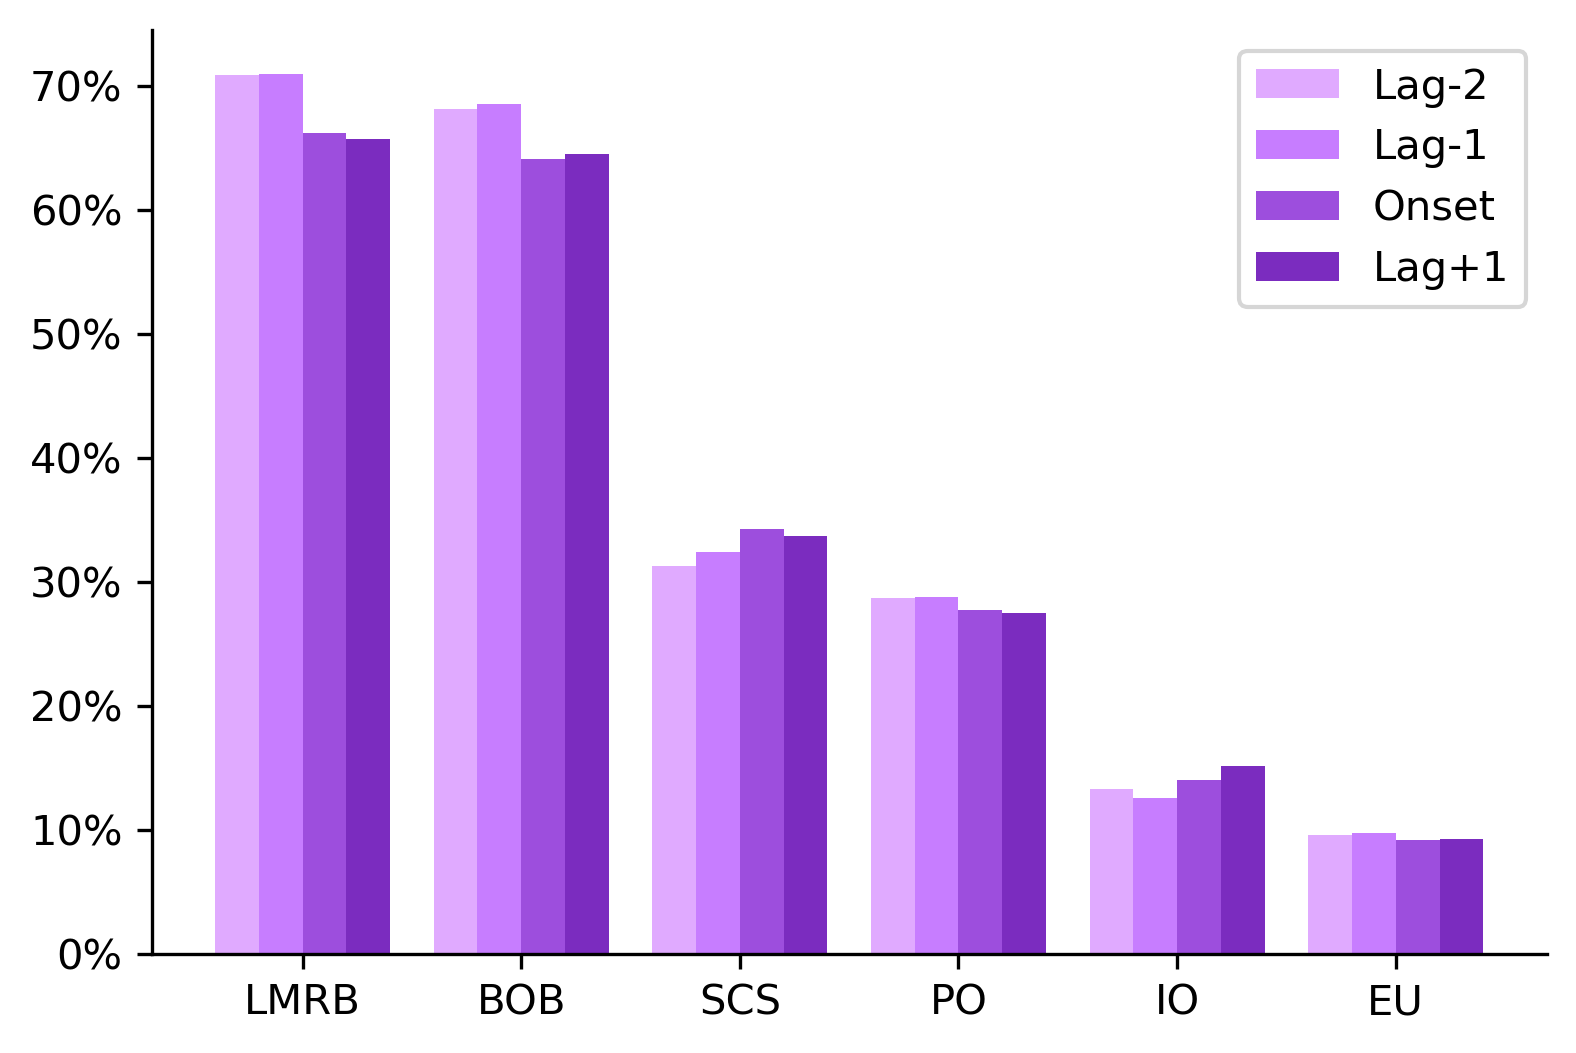

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Assuming you have defined your arrays arr_LMRB_wpscf_lag2, arr_BOB_wpscf_lag2, etc.

group_lag2 = [arr_BOB_wpscf_lag2, arr_LMRB_wpscf_lag2, arr_SCS_wpscf_lag2, arr_IO_wpscf_lag2, arr_PO_wpscf_lag2, arr_EU_wpscf_lag2]
group_lag1 = [arr_BOB_wpscf_lag1, arr_LMRB_wpscf_lag1, arr_SCS_wpscf_lag1, arr_IO_wpscf_lag1, arr_PO_wpscf_lag1, arr_EU_wpscf_lag1]
group_onset = [arr_BOB_wpscf_onset, arr_LMRB_wpscf_onset, arr_SCS_wpscf_onset, arr_IO_wpscf_onset, arr_PO_wpscf_onset, arr_EU_wpscf_onset]
group_lag11 = [arr_BOB_wpscf_lag11, arr_LMRB_wpscf_lag11, arr_SCS_wpscf_lag11, arr_IO_wpscf_lag11, arr_PO_wpscf_lag11, arr_EU_wpscf_lag11]

width = 0.2
x = np.arange(6)

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=300)

ax.bar(x - 0.3, group_lag2, width, color='#e0aaff', label='Lag-2')
ax.bar(x - 0.1, group_lag1, width, color='#c77dff', label='Lag-1')
ax.bar(x + 0.1, group_onset, width, color='#9d4edd', label='Onset')
ax.bar(x + 0.3, group_lag11, width, color='#7b2cbf', label='Lag+1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(x)
ax.set_xticklabels(['LMRB', 'BOB', 'SCS', 'PO', 'IO', 'EU'])
ax.legend()

def percent_formatter(x, pos):
    return f'{x:.0%}'
ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.savefig('Fig_save/inibar.pdf')
plt.show()


# External moisture flux.... start from here

## water vapor specific humidity contribution

In [171]:
ds_rh_lag2 = xr.open_mfdataset('pscf_wet/sprh/lag-2/domain_s*.nc')
ds_rh_lag1 = xr.open_mfdataset('pscf_wet/sprh/lag-1/domain_s*.nc')
ds_rh_onset = xr.open_mfdataset('pscf_wet/sprh/onset/domain_s*.nc')
ds_rh_lag11 = xr.open_mfdataset('pscf_wet/sprh/lag+1/domain_s*.nc')



In [222]:
ano_lag2 = ds_rh_onset - ds_rh_lag2
ano_lag1 = ds_rh_onset - ds_rh_lag1
ano_onset = ds_rh_onset - ds_rh_onset
ano_lag11 = ds_rh_onset - ds_rh_lag11

In [238]:
clist8=['#354482','#6877b5','#a1aad1','#ffffff','#ffffff','#ffffff','#ffffff','#f2b099','#e9754d','#701d01']

cmap8 = LinearSegmentedColormap.from_list('chaos',clist8)

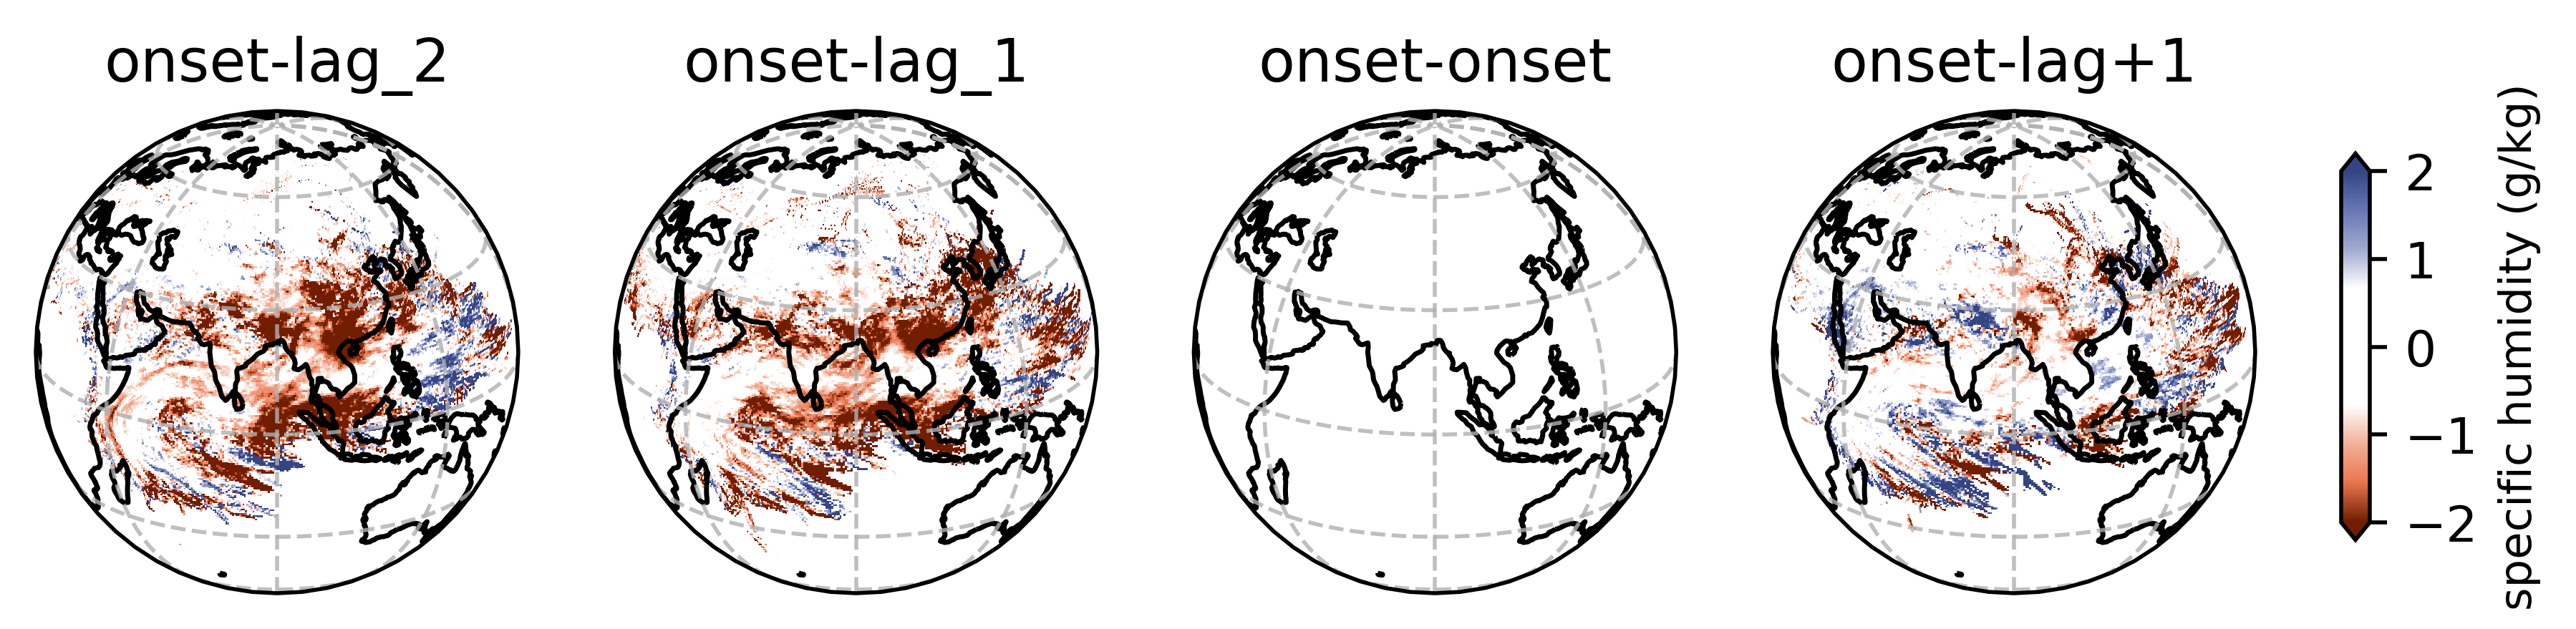

In [244]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have four datasets: ds_wpscf_lag2, ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11

# Assuming ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11 have the same coordinates, so using ds_wpscf_lag1 as an example
projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)

fig, ax = plt.subplots(1, 4, figsize=(8, 3), subplot_kw={'projection': projection}, dpi=500)

datasets = [ano_lag2,ano_lag1,ano_onset,ano_lag11]
titles = ['onset-lag_2', 'onset-lag_1','onset-onset','onset-lag+1',]

for i in range(4):
    ax[i].set_global()
    ax[i].coastlines()
    ax[i].gridlines(ls='--', alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
    wpscf = datasets[i].mean('time').domain_s.plot(
        ax=ax[i], transform=ccrs.PlateCarree(), cmap=cmap8.reversed(), add_colorbar=False, vmin=-2, vmax=2
    )
    ax[i].set_title(titles[i])

cax = fig.add_axes([0.93, 0.32, 0.01, 0.36])
cbar = plt.colorbar(wpscf, cax=cax, orientation='vertical', extend='both')
cbar.set_label('specific humidity (g/kg)',fontsize=9)
cbar.set_ticks([-2.,-1,0,1,2])

plt.show()

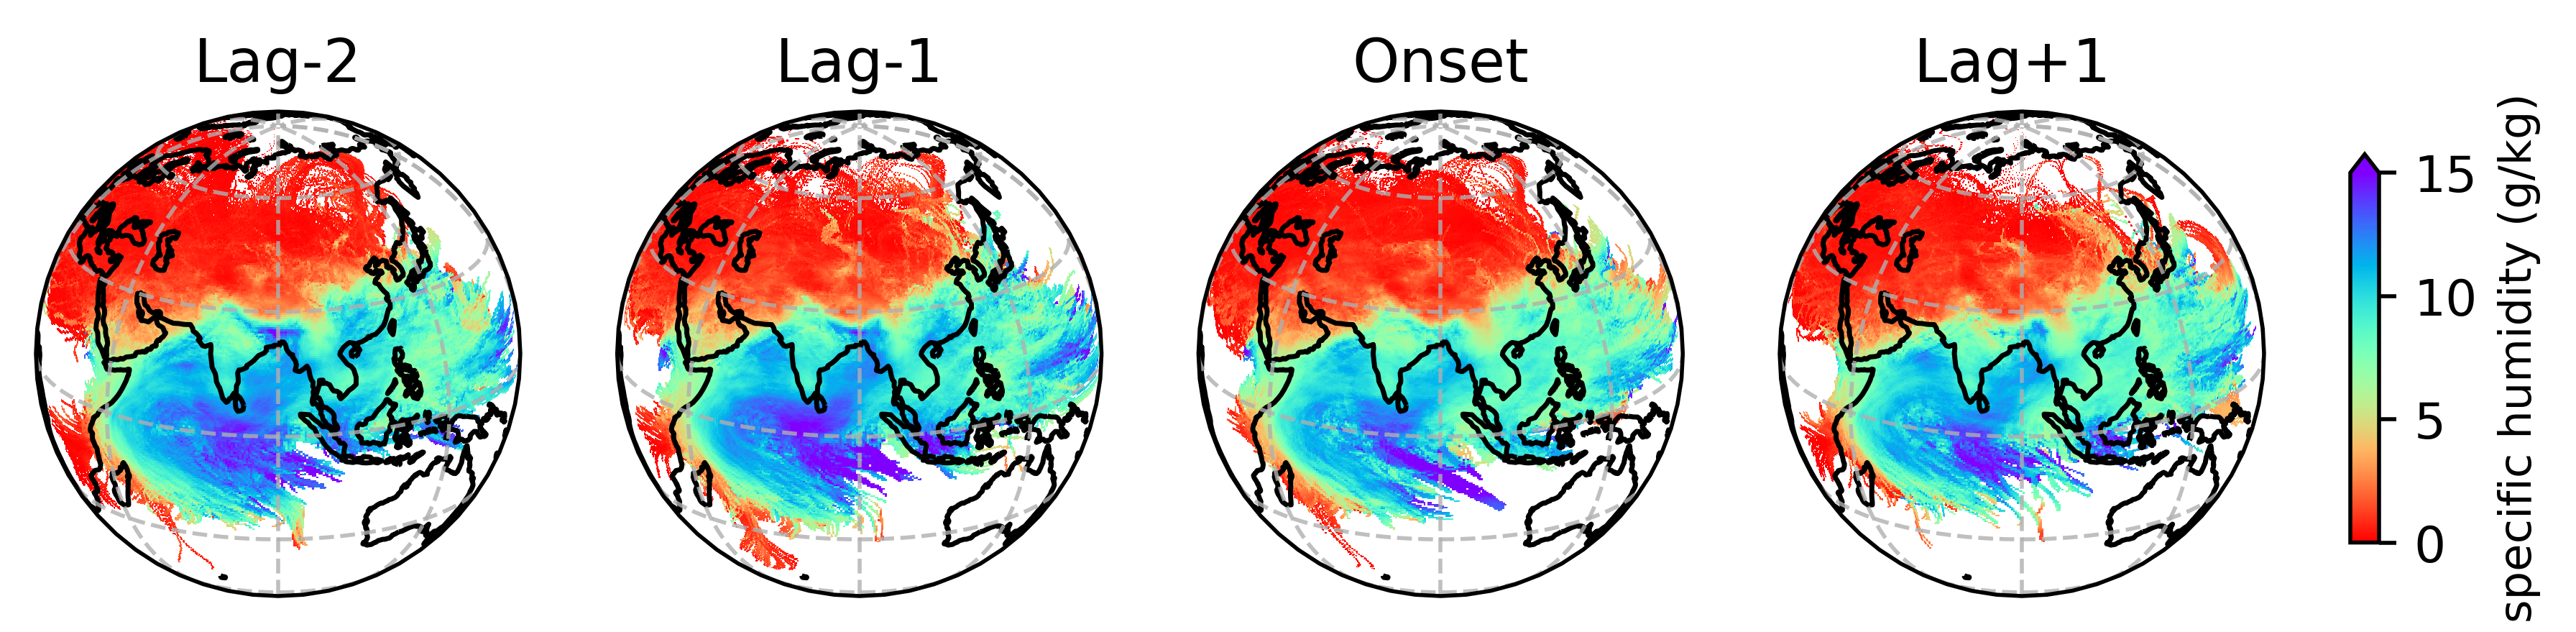

In [245]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have four datasets: ds_wpscf_lag2, ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11

# Assuming ds_wpscf_lag1, ds_wpscf_onset, ds_wpscf_lag11 have the same coordinates, so using ds_wpscf_lag1 as an example
projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)

fig, ax = plt.subplots(1, 4, figsize=(8, 3), subplot_kw={'projection': projection}, dpi=500)

datasets = [ds_rh_lag2,ds_rh_lag1, ds_rh_onset, ds_rh_lag11]
titles = ['Lag-2', 'Lag-1', 'Onset', 'Lag+1 ']

for i in range(4):
    ax[i].set_global()
    ax[i].coastlines()
    ax[i].gridlines(ls='--', alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
    wpscf = datasets[i].mean('time').domain_s.plot(
        ax=ax[i], transform=ccrs.PlateCarree(), cmap='rainbow_r', add_colorbar=False, vmin=0, vmax=15
    )
    ax[i].set_title(titles[i])

cax = fig.add_axes([0.93, 0.32, 0.01, 0.36])
cbar = plt.colorbar(wpscf, cax=cax, orientation='vertical', extend='max')
cbar.set_label('specific humidity (g/kg)',fontsize=9)
#cbar.set_ticks([0, 0.4, 0.8])

plt.show()

In [247]:
names = locals()
namm = ['lag2', 'lag1', 'onset', 'lag11']
for ds,nam in zip(datasets,namm):
    LMRB_wpscf = ds.sel(lon=slice(93.5, 109.5), lat=slice(25.5, 8.5))
    BOB_wpscf = ds.sel(lon=slice(77, 93.5), lat=slice(23, 3))
    SCS_wpscf = ds.sel(lon=slice(109.5, 133.5), lat=slice(34, 8.5))
    
    region1_PO = ds.sel(lon=slice(121.5, 133.5), lat=slice(45, 34))
    region2_PO = ds.sel(lon=slice(121.5, 133.5), lat=slice(8.5, -30))
    region3_PO = ds.sel(lon=slice(133.5, 180), lat=slice(45, -30))
    region4_PO = ds.sel(lon=slice(-180, -170), lat=slice(45, -30))
    PO_wpscf = xr.concat([region1_PO, region2_PO,], dim="new_dim")
    
    region1_IO = ds.sel(lon=slice(40, 77), lat=slice(23, -45))
    region2_IO = ds.sel(lon=slice(77, 121.5), lat=slice(3, -45))
    region3_IO = ds.sel(lon=slice(93.5, 109.5), lat=slice(8.5, 3))
    IO_wpscf = xr.concat([region1_IO, region2_IO, region3_IO], dim="new_dim")
    
    region1_EU = ds.sel(lon=slice(40, 93.5), lat=slice(90, 23))
    region2_EU = ds.sel(lon=slice(93.5, 109.5), lat=slice(90, 25.5))
    region3_EU = ds.sel(lon=slice(109.5, 121.5), lat=slice(90, 28))
    region4_EU = ds.sel(lon=slice(121.5, 190), lat=slice(90, 45))
    region5_EU = ds.sel(lon=slice(-170, 40), lat=slice(90, -45))
    EU_wpscf = xr.concat([region1_EU, region2_EU, region3_EU, region4_EU, region5_EU], dim="new_dim")

    tot_wpscf = ds
    
    names['arr_LMRB_wpscf_'+nam] = np.nanmean(LMRB_wpscf.domain_s.values)
    names['arr_BOB_wpscf_'+nam] = np.nanmean(BOB_wpscf.domain_s.values)
    names['arr_SCS_wpscf_'+nam] = np.nanmean(SCS_wpscf.domain_s.values)
    names['arr_PO_wpscf_'+nam] = np.nanmean(PO_wpscf.domain_s.values)
    names['arr_IO_wpscf_'+nam] = np.nanmean(IO_wpscf.domain_s.values)
    names['arr_EU_wpscf_'+nam] = np.nanmean(EU_wpscf.domain_s.values)
    names['arr_tot_wpscf_'+nam] = names['arr_LMRB_wpscf_'+nam]+names['arr_BOB_wpscf_'+nam]+names['arr_SCS_wpscf_'+nam]+names['arr_PO_wpscf_'+nam]+names['arr_IO_wpscf_'+nam]+names['arr_EU_wpscf_'+nam]


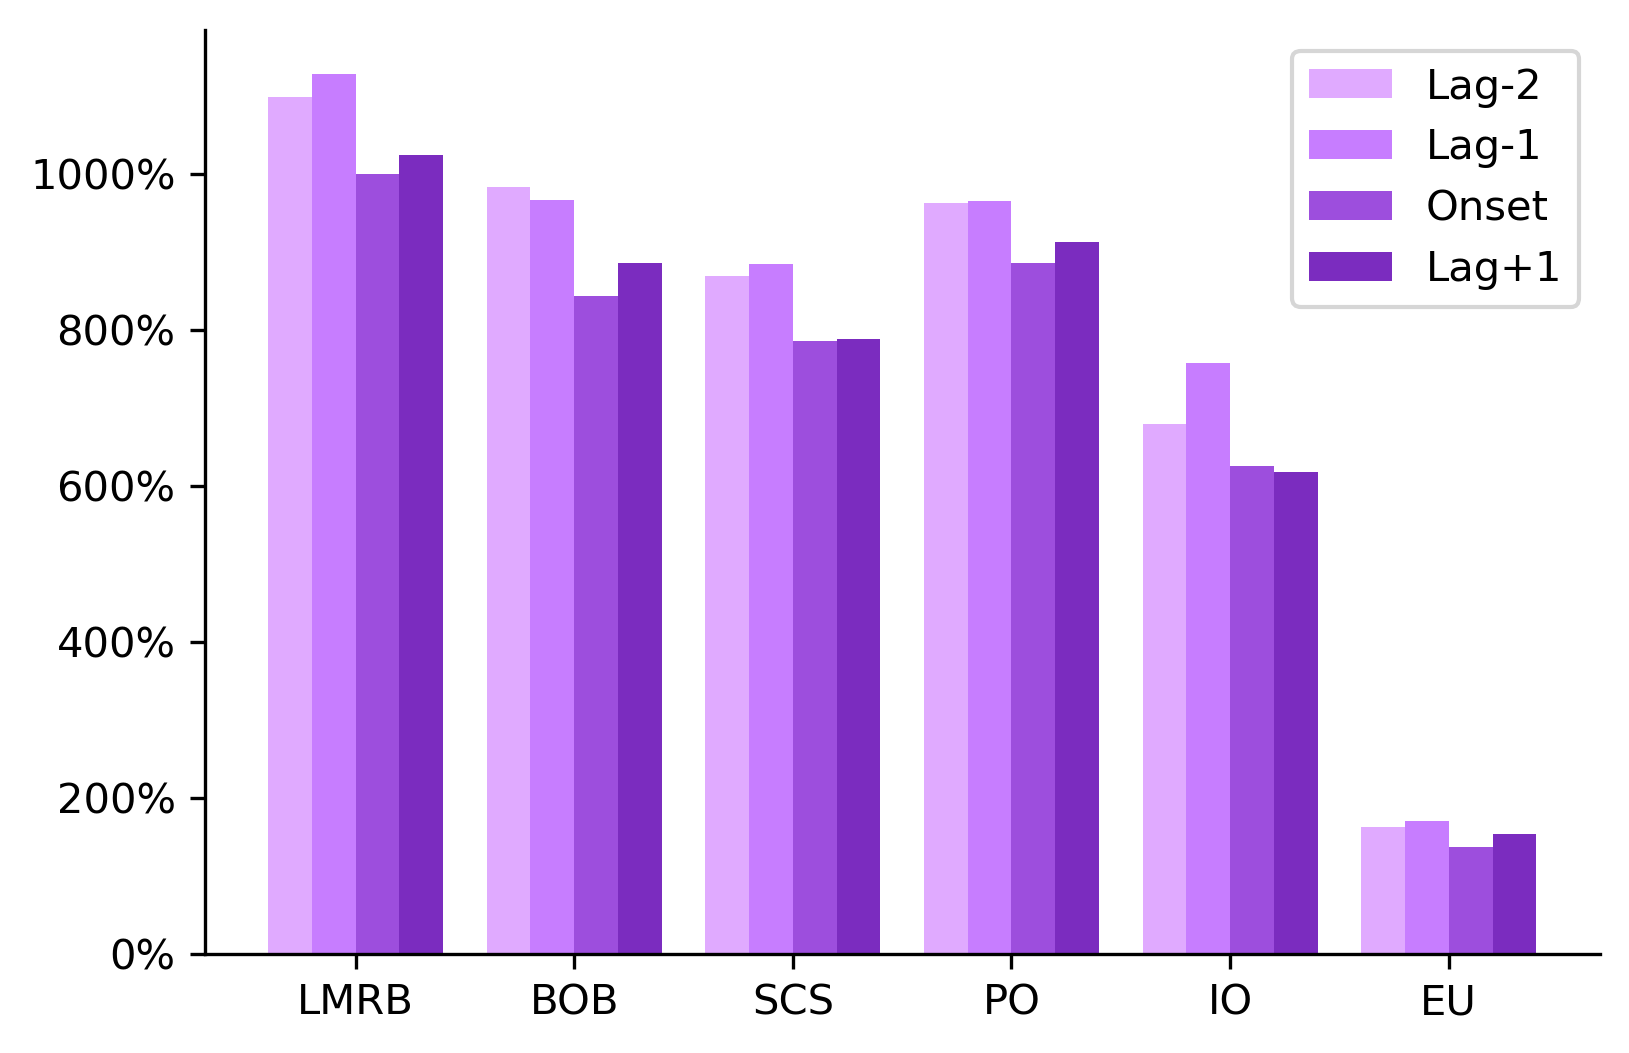

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Assuming you have defined your arrays arr_LMRB_wpscf_lag2, arr_BOB_wpscf_lag2, etc.

group_lag2 = [arr_BOB_wpscf_lag2, arr_LMRB_wpscf_lag2, arr_SCS_wpscf_lag2, arr_IO_wpscf_lag2, arr_PO_wpscf_lag2, arr_EU_wpscf_lag2]
group_lag1 = [arr_BOB_wpscf_lag1, arr_LMRB_wpscf_lag1, arr_SCS_wpscf_lag1, arr_IO_wpscf_lag1, arr_PO_wpscf_lag1, arr_EU_wpscf_lag1]
group_onset = [arr_BOB_wpscf_onset, arr_LMRB_wpscf_onset, arr_SCS_wpscf_onset, arr_IO_wpscf_onset, arr_PO_wpscf_onset, arr_EU_wpscf_onset]
group_lag11 = [arr_BOB_wpscf_lag11, arr_LMRB_wpscf_lag11, arr_SCS_wpscf_lag11, arr_IO_wpscf_lag11, arr_PO_wpscf_lag11, arr_EU_wpscf_lag11]

width = 0.2
x = np.arange(6)

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=300)

ax.bar(x - 0.3, group_lag2, width, color='#e0aaff', label='Lag-2')
ax.bar(x - 0.1, group_lag1, width, color='#c77dff', label='Lag-1')
ax.bar(x + 0.1, group_onset, width, color='#9d4edd', label='Onset')
ax.bar(x + 0.3, group_lag11, width, color='#7b2cbf', label='Lag+1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(x)
ax.set_xticklabels(['LMRB', 'BOB', 'SCS', 'PO', 'IO', 'EU'])
ax.legend()

def percent_formatter(x, pos):
    return f'{x:.0%}'
ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
# plt.savefig('Fig_save/inibar.pdf')
plt.show()

# Dry season

In [20]:
ds_onset = xr.open_dataset('fdonset.nc')
ds_cin = xr.open_dataset('mete_week/CIN/weekly_CIN_lmrb.nc')
ds_omega = xr.open_dataset('mete_week/omega/omega_weekly.nc')

### select onset and antecedent meteorological conditions

In [21]:
onset = ds_onset.onset.values
cin = ds_cin.cin.values
omega = ds_omega.w.values

In [22]:
omega_on=[]
cin_on = []
for i in range(102):
    for j in range(61):
        for l in range(3276):
            if np.isnan(onset[l,i,j]):
                omega_on.append(np.full((4, 12), np.nan))
                cin_on.append(np.array([np.nan,np.nan,np.nan,np.nan]))
            elif l==(0|1|3274|3275):
                omega_on.append(np.full((4, 12), np.nan))
                cin_on.append(np.array([np.nan,np.nan,np.nan,np.nan]))
            elif onset[l,i,j]==1:
                omega_on.append(np.array(omega[l-2:l+2,:,i,j]))
                cin_on.append(np.array(cin[l-2:l+2,i,j]))
omega_on = np.vstack(np.array(omega_on)).reshape(102,61,63,52,4,12)
cin_on = np.vstack(np.array(cin_on)).reshape(102,61,63,52,4)

In [23]:
omega_wm = []
cin_wm = []
for i in range(102):
    for j in range(61):
        for l in range(3276):
            if np.isnan(omega[l,1,i,j]):
                omega_wm.append(np.full((4, 12), np.nan))
                cin_wm.append(np.array([np.nan,np.nan,np.nan,np.nan]))
            elif l!=(0|1|3274|3275):
                omega_wm.append(np.array(omega[l-2:l+2,:,i,j]))
                cin_wm.append(np.array(cin[l-2:l+2,i,j]))
            else:
                omega_wm.append(np.full((4, 12), np.nan))
                cin_wm.append(np.array([np.nan,np.nan,np.nan,np.nan]))
                
for i in range(len(omega_wm)):
    if omega_wm[i].size == 0:
        omega_wm[i] = np.full((4, 12), np.nan)

for i in range(len(cin_wm)):
    if cin_wm[i].size == 0:
        cin_wm[i] = np.array([np.nan, np.nan, np.nan, np.nan])
        
omega_wm = np.vstack(np.array(omega_wm)).reshape(102,61,63,52,4,12)
cin_wm = np.vstack(np.array(cin_wm)).reshape(102,61,63,52,4)

In [24]:
omega_lag = omega_on - omega_wm
cin_lag = cin_on - cin_wm

In [25]:
ds_omega_wm = xr.Dataset(
    {'w': (['lat', 'lon', 'year', 'week', 'lag', 'level'], omega_wm)},
    coords={
        'lat': (['lat'], ds_omega.lat.values),
        'lon': (['lon'], ds_omega.lon.values),
        'year': (['year'], np.arange(1960, 2023)),
        'week': (['week'], np.arange(0, 52)),
        'lag': (['lag'], np.arange(0, 4)),
        'level': (['level'], ds_omega.level.values),
    }
)


ds_omega_on = xr.Dataset(
    {'w': (['lat', 'lon', 'year', 'week', 'lag', 'level'], omega_on)},
    coords={
        'lat': (['lat'], ds_omega.lat.values),
        'lon': (['lon'], ds_omega.lon.values),
        'year': (['year'], np.arange(1960, 2023)),
        'week': (['week'], np.arange(0, 52)),
        'lag': (['lag'], np.arange(0, 4)),
        'level': (['level'], ds_omega.level.values),
    }
)

ds_omega_wm = xr.Dataset(
    {'w': (['lat', 'lon', 'year', 'week', 'lag', 'level'], omega_wm)},
    coords={
        'lat': (['lat'], ds_omega.lat.values),
        'lon': (['lon'], ds_omega.lon.values),
        'year': (['year'], np.arange(1960, 2023)),
        'week': (['week'], np.arange(0, 52)),
        'lag': (['lag'], np.arange(0, 4)),
        'level': (['level'], ds_omega.level.values),
    }
)


ds_cin_wm = xr.Dataset({'cin': (['lat', 'lon', 'year', 'week','lag'], cin_wm)},
                    coords={'lat': (['lat'], ds_cin.lat.values),
                            'lon': (['lon'], ds_cin.lon.values),
                            'year': (['year'], np.arange(1960,2023)),
                            'week': (['week'], np.arange(0,52)),
                            'lag': (['lag'], np.arange(0,4))})

ds_cin_on = xr.Dataset({'cin': (['lat', 'lon', 'year', 'week','lag'], cin_on)},
                    coords={'lat': (['lat'], ds_cin.lat.values),
                            'lon': (['lon'], ds_cin.lon.values),
                            'year': (['year'], np.arange(1960,2023)),
                            'week': (['week'], np.arange(0,52)),
                            'lag': (['lag'], np.arange(0,4))})

In [26]:
slice1 = ds_omega_wm.week.isin(range(0, 17))
slice2 = ds_omega_wm.week.isin(range(43, 53))

ds_omegawm_dry = ds_omega_wm.sel(week=(slice1 | slice2))
ds_omegaon_dry = ds_omega_on.sel(week=(slice1 | slice2))

ds_cinwm_dry = ds_cin_wm.sel(week=(slice1 | slice2))
ds_cinon_dry = ds_cin_on.sel(week=(slice1 | slice2))

omega_lag_dry = np.nanmean(ds_omegaon_dry.w.values,axis=(0,1,2,3))-np.nanmean(ds_omegawm_dry.w.values,axis=(0,1,2,3))
variaomega_on = [omega_lag_dry[0],omega_lag_dry[1],omega_lag_dry[2],omega_lag_dry[3],]

cin_lag_dry = np.nanmean(ds_cinon_dry.cin.values,axis=(2,3))-np.nanmean(ds_cinwm_dry.cin.values,axis=(2,3))
variacin_on = [cin_lag_dry[:,:,0],cin_lag_dry[:,:,1],cin_lag_dry[:,:,2],cin_lag_dry[:,:,3],]

In [27]:
clist1 =['#ffffff','#f8ad9d','#ff758f','#3a20f0']
red1 = LinearSegmentedColormap.from_list('chaos',clist1)

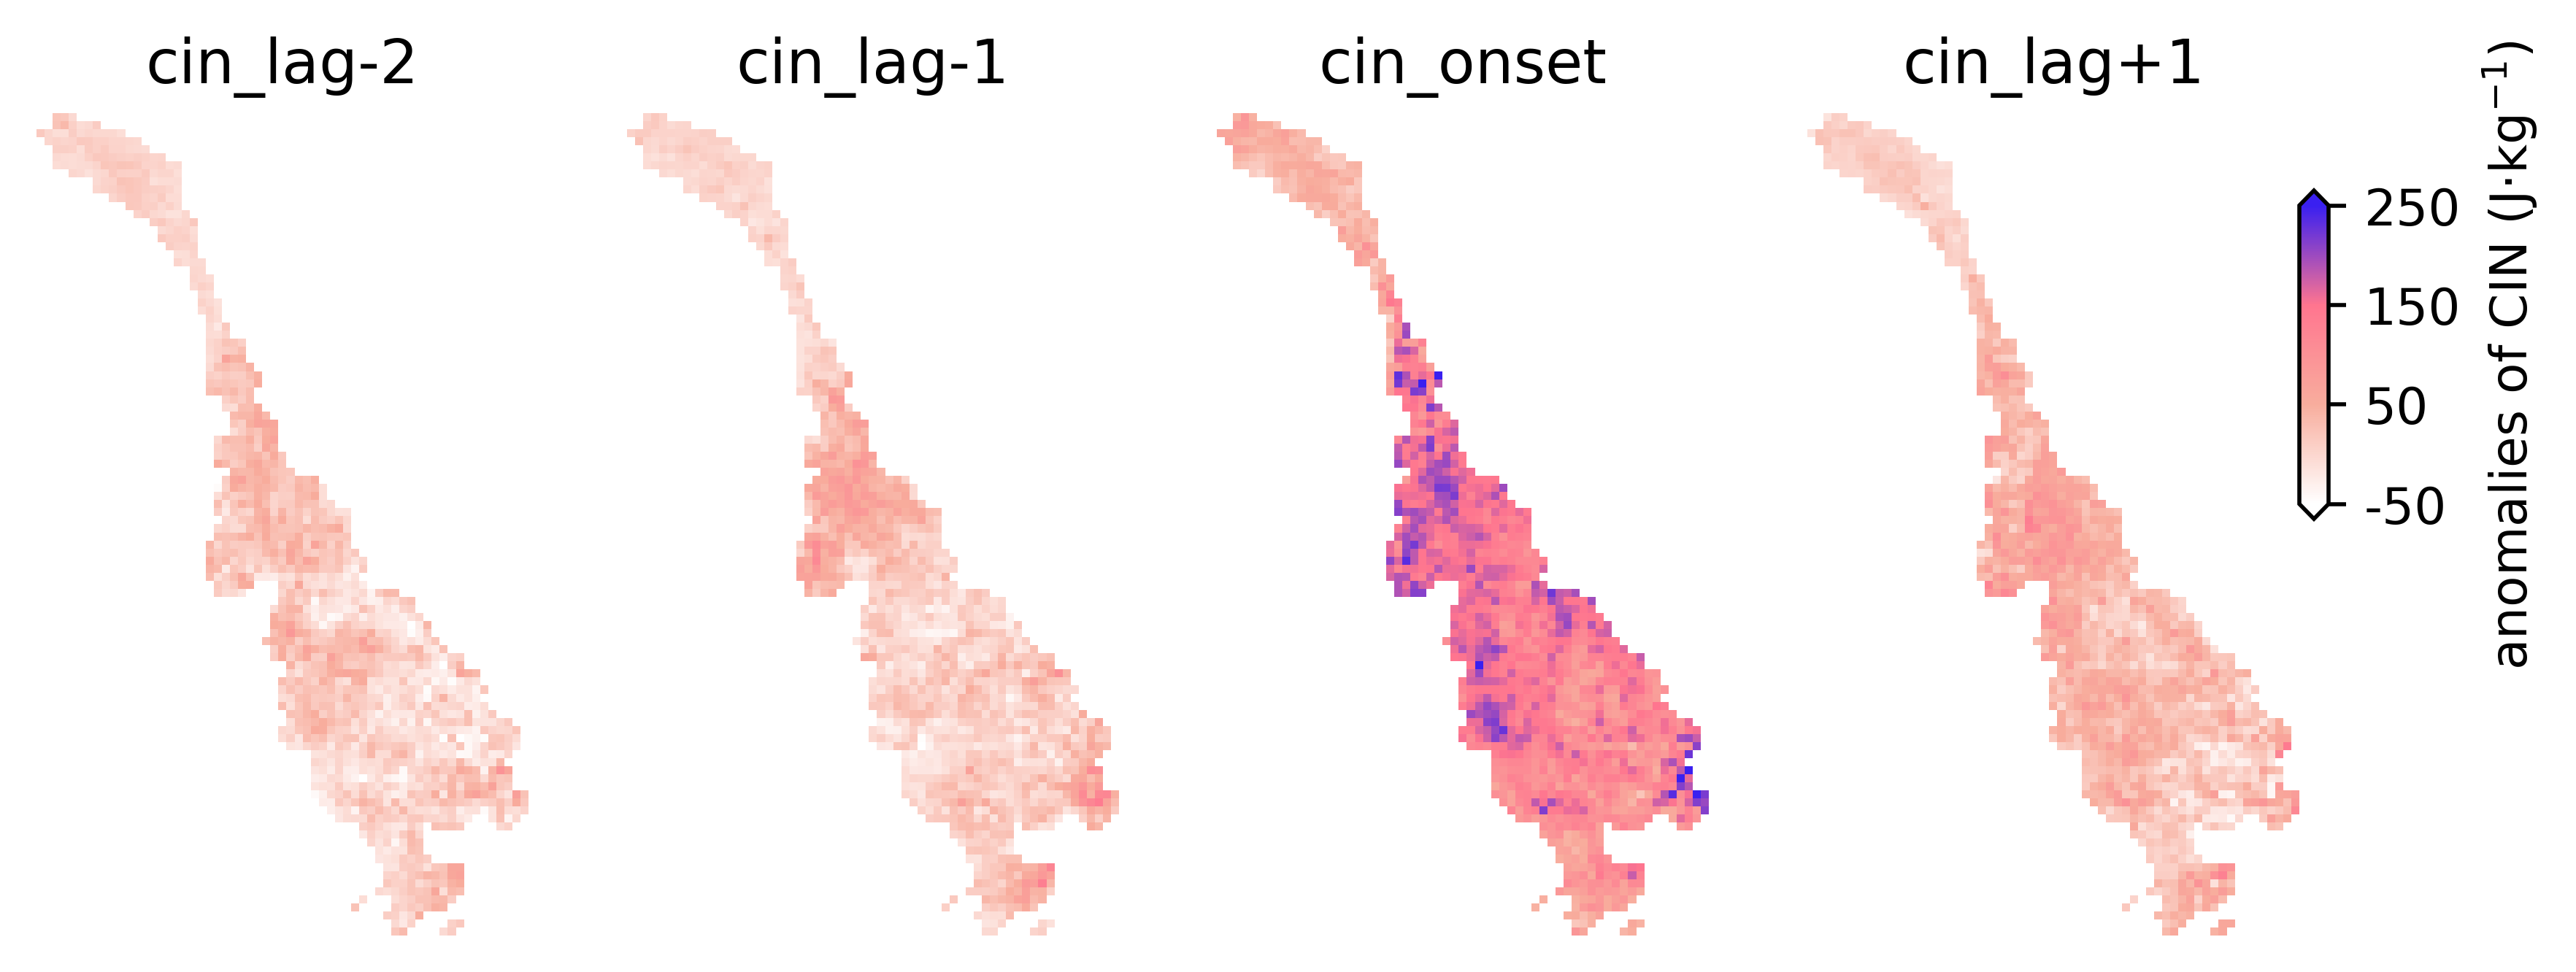

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(8, 3), dpi=500)
images = []

namesscin_on = ['cin_lag-2', 'cin_lag-1', 'cin_onset','cin_lag+1',]


for i, (qt, subplot, name) in enumerate(zip(variacin_on, ax.flat, namesscin_on)):
    im = subplot.imshow(qt, cmap=red1, interpolation='nearest',vmin=-50,vmax=250)
    images.append(im)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_frame_on(False)
    # ax[-1, -1].axis('off')
    subplot.set_title(name)

cax = fig.add_axes([0.9, 0.50, 0.01, 0.3])
cbar = plt.colorbar(im, cax=cax, extend='both')
cbar.set_ticks([-50,50,150,250])
cbar.set_ticklabels(['-50','50','150','250'])
cbar.set_label('anomalies of CIN (J·kg$^{-1}$)')

plt.show()

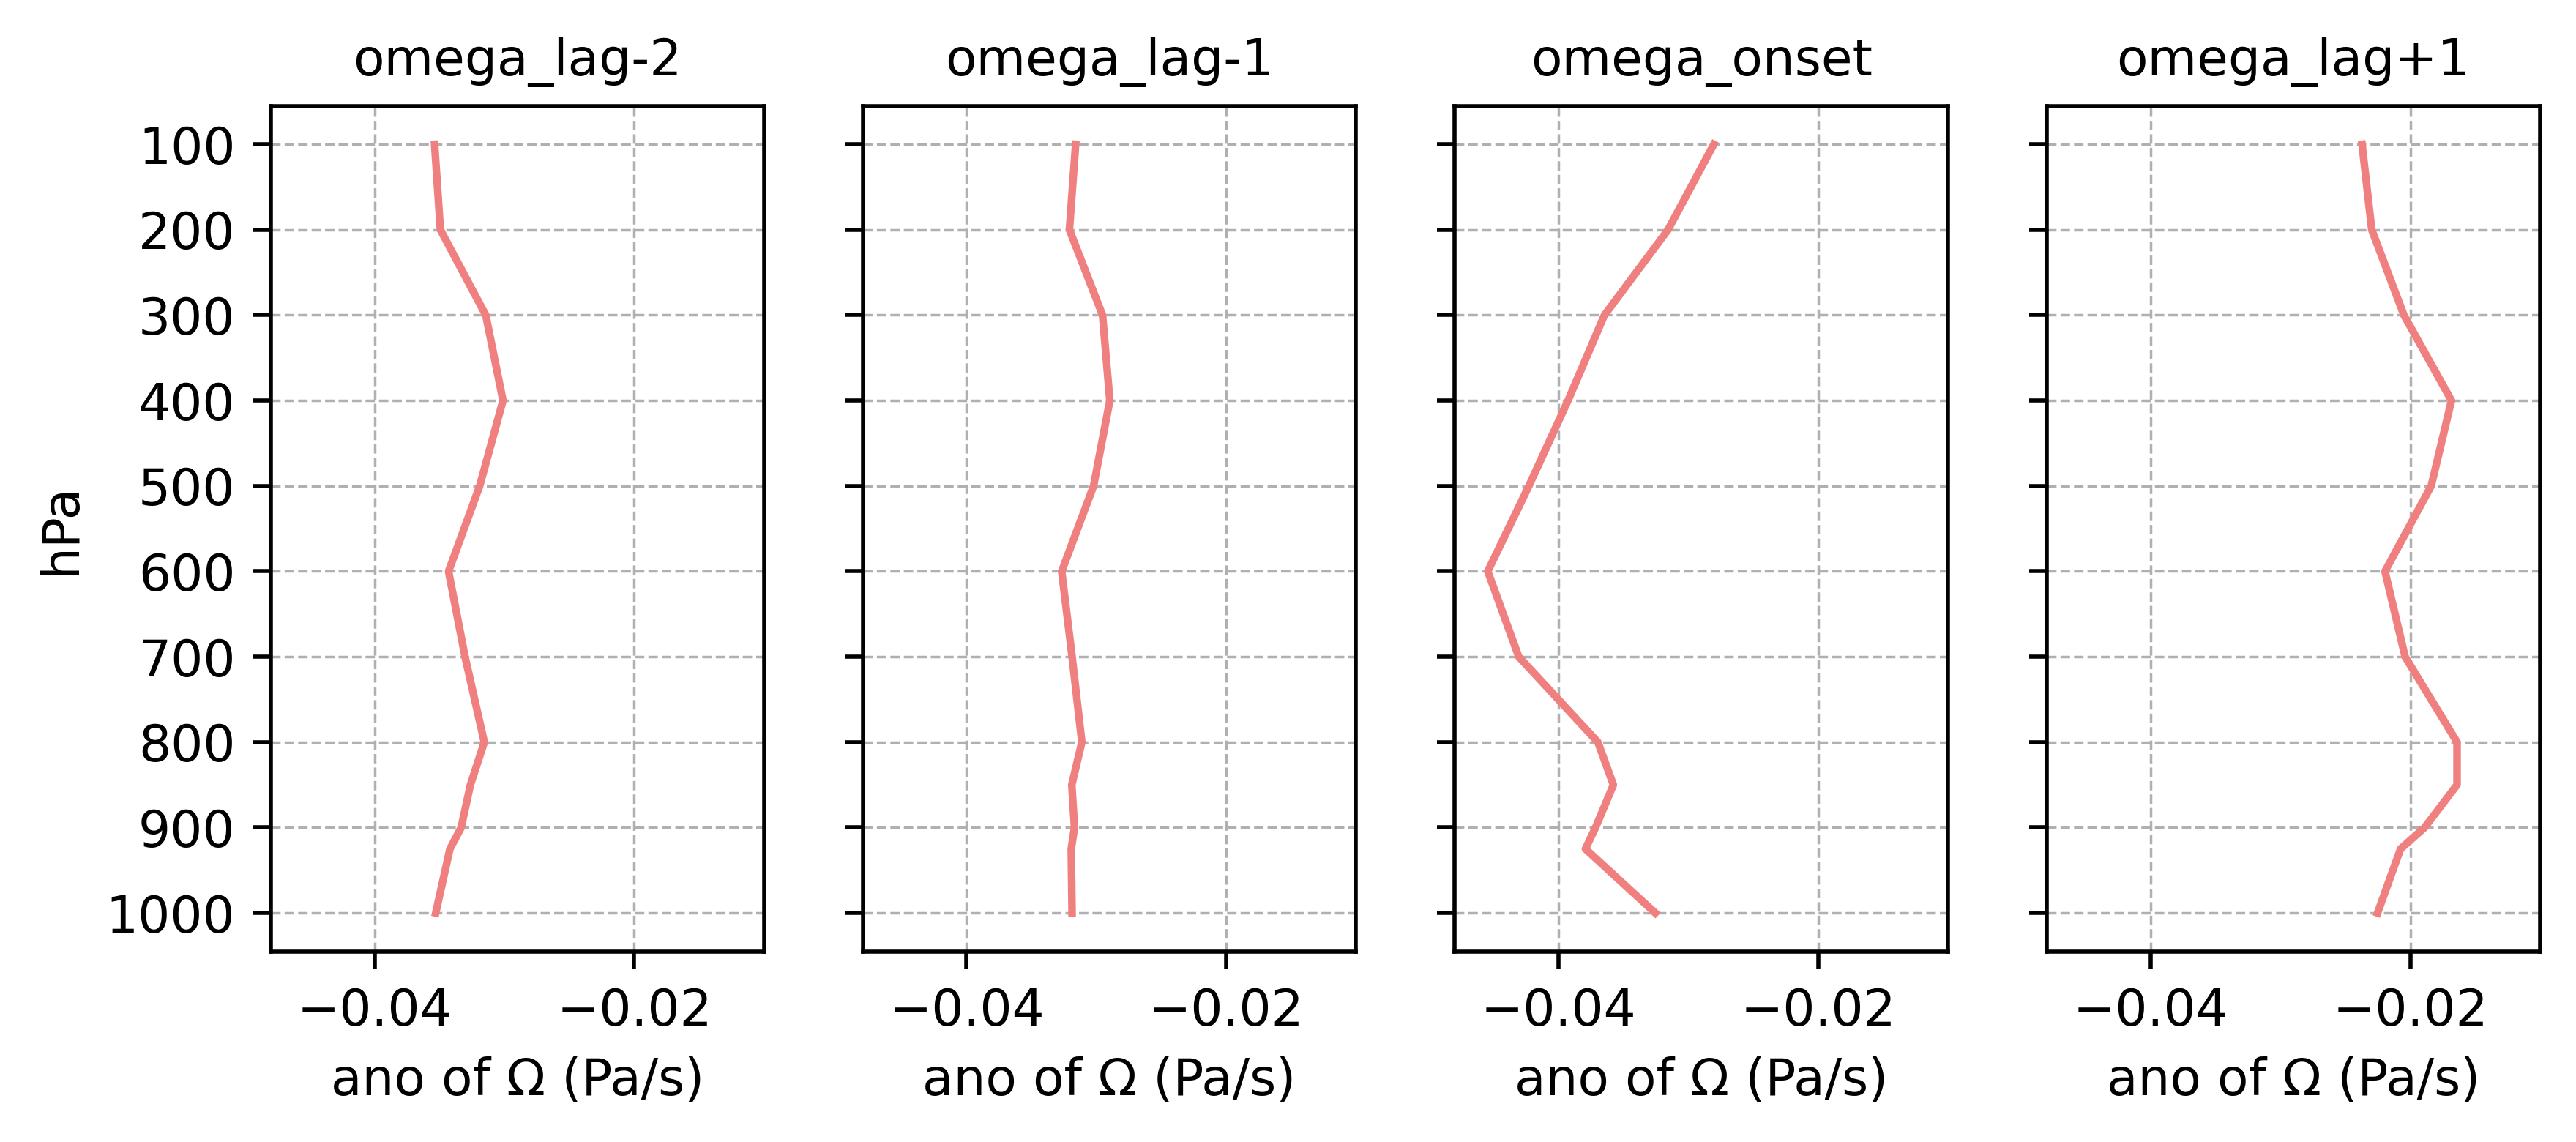

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(1, 4, figsize=(8, 3), dpi=500)
namessomega_on = ['omega_lag-2', 'omega_lag-1', 'omega_onset', 'omega_lag+1']

for i, (qt, subplot, name) in enumerate(zip(variaomega_on, ax.flat, namessomega_on)):
    lines = subplot.plot(-qt, ds_omega.level, c = '#f08080')
    subplot.set_title(name, fontsize=10)
    subplot.set_xlim( -0.048,-0.01,)
    subplot.grid(ls='--', lw=0.5)
    subplot.set_xlabel('ano of Ω (Pa/s)')
    if i != 0:  # Remove y-tick labels for all subplots except the first one
        subplot.set_yticks(np.arange(100, 1001, 100))
        subplot.set_yticklabels([])  # Remove y-tick labels
    else:  
        subplot.set_yticks(np.arange(100, 1001, 100))
        subplot.set_ylabel('hPa')
    subplot.invert_yaxis()

plt.show()

## omega-latitude plot

In [30]:
df_dem = pd.read_csv('m_altitude.csv')

In [31]:
k = -0.12 
b = 1015   
df_dem['hpa'] = k * df_dem['altitude'] + b
df_dem.loc[df_dem['hpa'] > 1000, 'hpa'] = np.nan
al_hpa = df_dem['hpa'].values

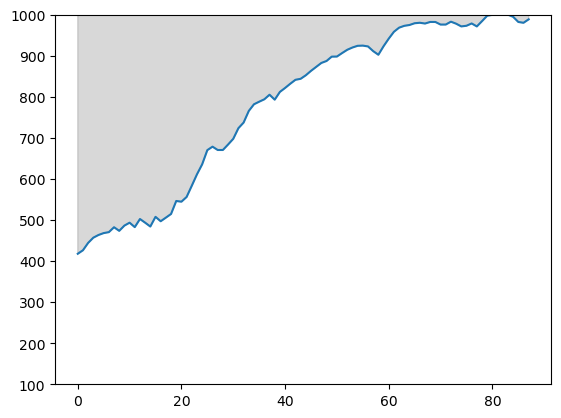

In [32]:
plt.plot(al_hpa)
plt.ylim(100, 1000)
plt.fill_between(range(len(al_hpa)), al_hpa, 1000, color='gray', alpha=0.3)
plt.savefig('Fig_save/terr.pdf')
plt.show()

In [33]:
omega_lag_dry_lat = np.nanmean(ds_omegaon_dry.w.values,axis=(1,2,3))-np.nanmean(ds_omegawm_dry.w.values,axis=(1,2,3))
variaomega_on_lat = [omega_lag_dry_lat[:,0,:],omega_lag_dry_lat[:,1,:],omega_lag_dry_lat[:,2,:],omega_lag_dry_lat[:,3,:],]

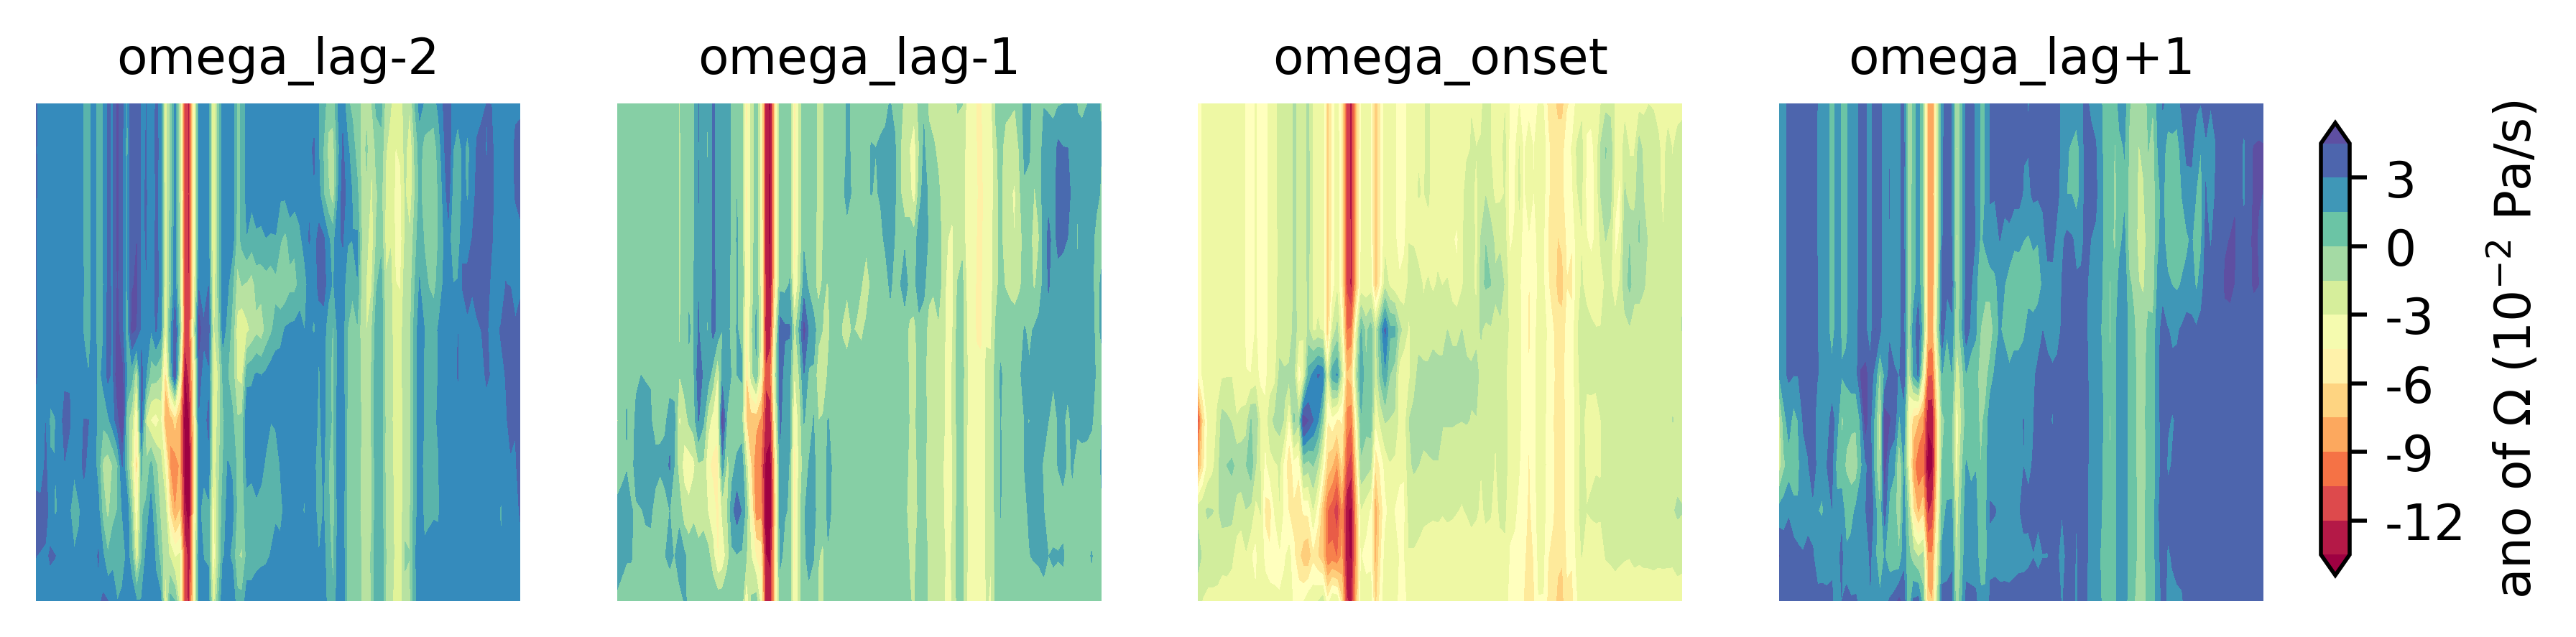

In [35]:
fig, ax = plt.subplots(1, 4, figsize=(8, 1.8), dpi=500)
images = []

namesscin_on = ['omega_lag-2', 'omega_lag-1', 'omega_onset', 'omega_lag+1']
for i, (qt, subplot, name) in enumerate(zip(variaomega_on_lat, ax.flat, namesscin_on)):
    levels = 16  # 根据需要调整等高线的级别
    im = subplot.contourf(qt.transpose(1, 0), levels, cmap='Spectral', extend='both',)
    images.append(im)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_frame_on(False)
    subplot.set_title(name,fontsize=10)



cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = plt.colorbar(im, cax=cax, extend='both')
cbar.set_ticks([-0.12,-0.09,-0.06,-0.03,0.00,0.03])
cbar.set_ticklabels(['-12','-9','-6','-3','0','3'])
cbar.set_label('ano of Ω (10$^{-2}$ Pa/s)',fontsize=10)
plt.savefig('Fig_save/omega__.pdf')
plt.show()


In [47]:
omega_lag_dry_lon = np.nanmean(ds_omegaon_dry.w.values,axis=(2,3,5))-np.nanmean(ds_omegawm_dry.w.values,axis=(2,3,5))
variaomega_on_lon = [omega_lag_dry_lat[:,:,0],omega_lag_dry_lat[:,:,1],omega_lag_dry_lat[:,:,2],omega_lag_dry_lat[:,:,3],]

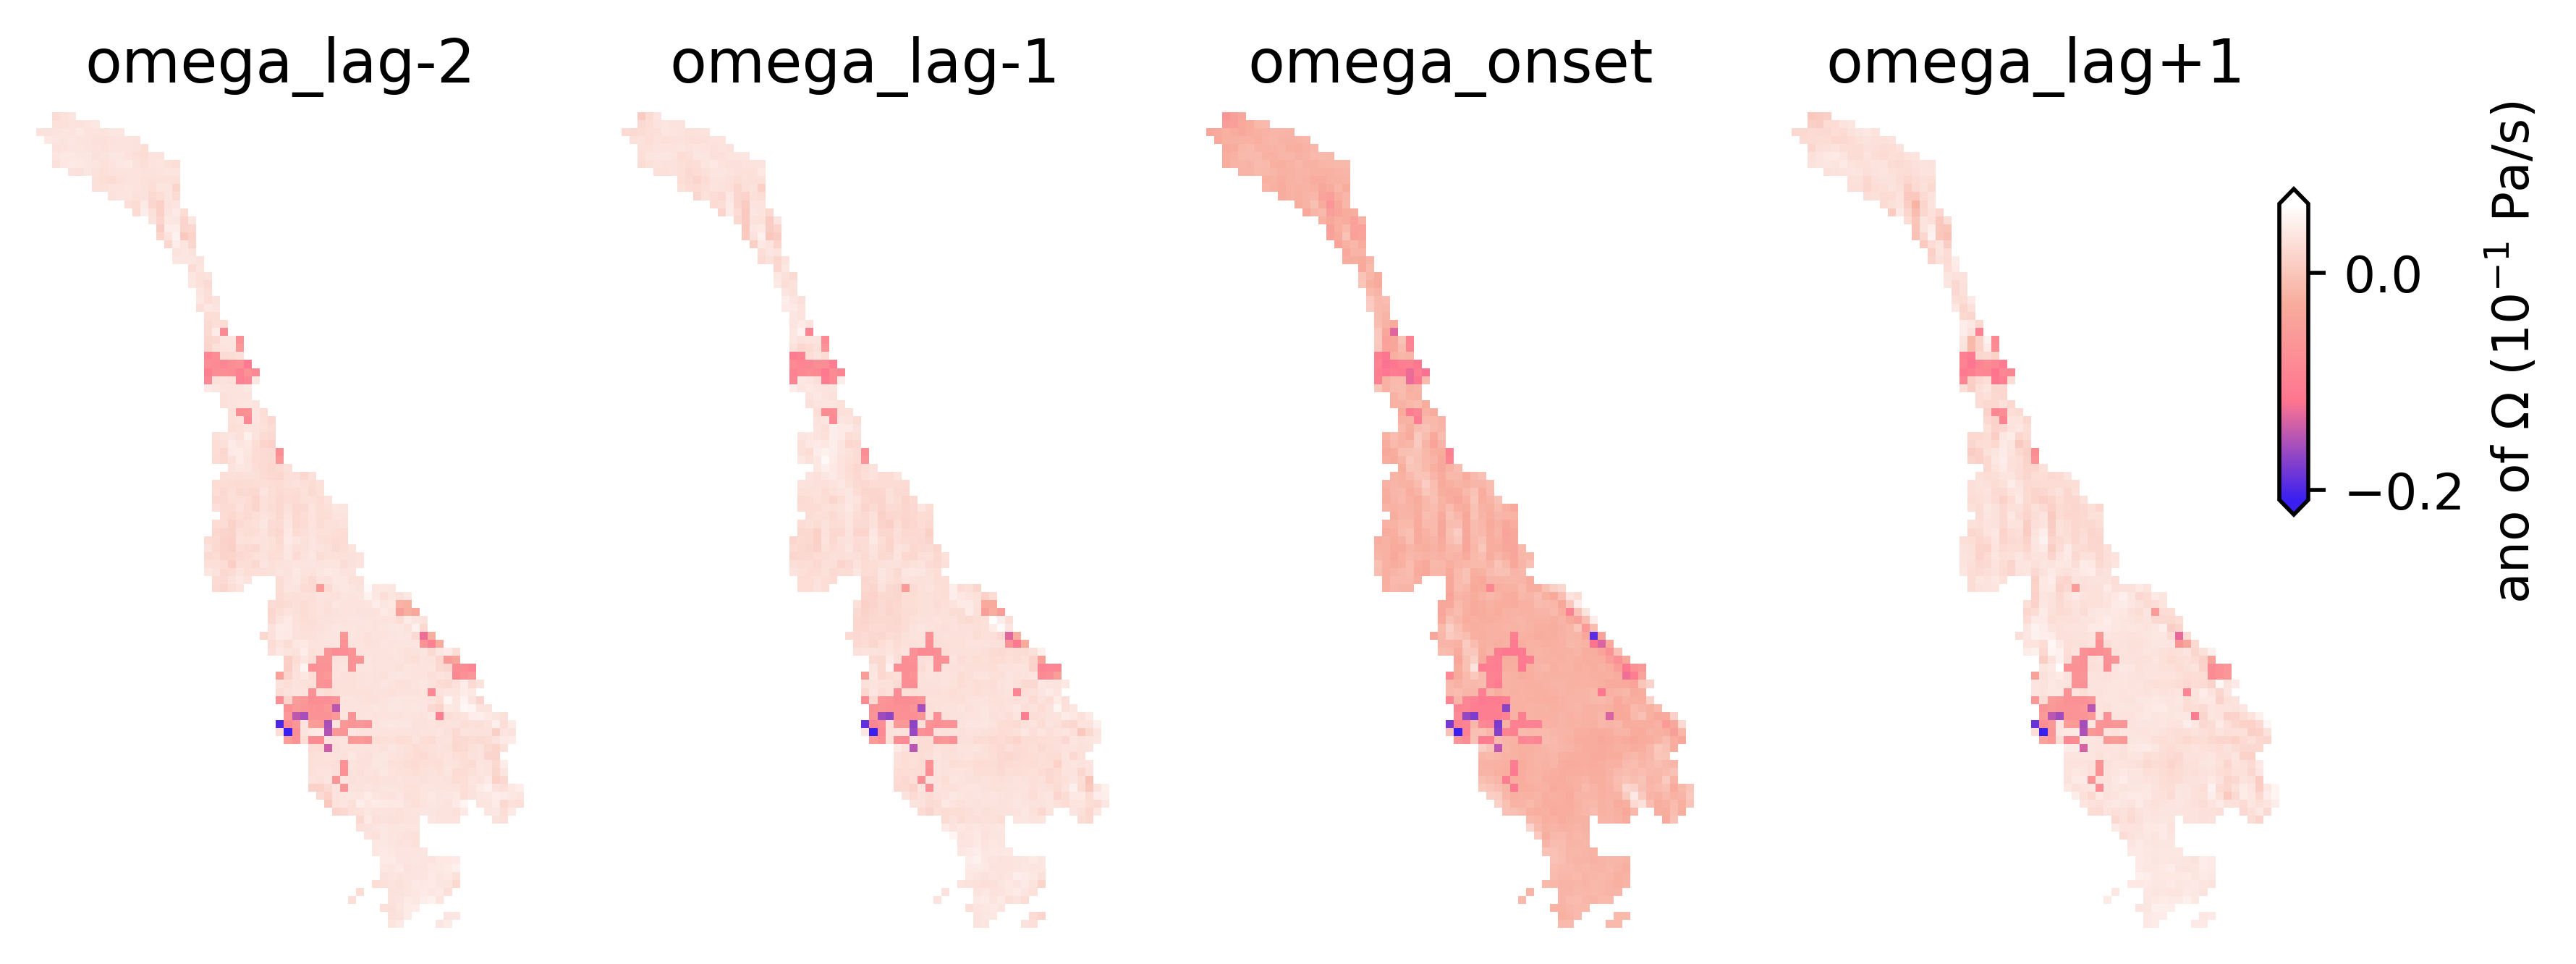

In [74]:
fig, ax = plt.subplots(1, 4, figsize=(8, 3), dpi=500)
images = []

namesscin_on = ['omega_lag-2', 'omega_lag-1', 'omega_onset', 'omega_lag+1']


for i, (qt, subplot, name) in enumerate(zip(variaomega_on_lon, ax.flat, namesscin_on)):
    im = subplot.imshow(qt, cmap=red1.reversed(), interpolation='nearest')
    images.append(im)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_frame_on(False)
    # ax[-1, -1].axis('off')
    subplot.set_title(name)

cax = fig.add_axes([0.9, 0.50, 0.01, 0.3])
cbar = plt.colorbar(im, cax=cax, extend='both')
# cbar.set_ticks([-0.1,0,0.1])
# cbar.set_ticklabels(['-1','0','1'])
cbar.set_label('ano of Ω (10$^{-1}$ Pa/s)')

plt.show()

# rePSCF do not run!!

In [ ]:
# for i in range(1961,2023):
#     ds_m = xr.open_dataset('pscf_wet/domain_m_'+str(i)+'.nc')
#     ds_n = xr.open_dataset('pscf_wet/domain_n_'+str(i)+'.nc')


#     array_m = ds_m.domain_m.values
#     array_n = ds_n.domain_n.values
#     pscf = array_m/array_n
#     wpscf = array_m/array_n
    
    
#     array_n[array_n == 0] = np.nan
#     average_n = np.nanmean(array_n)

#     condition_1 = array_n > 3*average_n
#     condition_2 = (1.5*average_n < array_n) & (array_n <= 3*average_n)
#     condition_3 = (1*average_n < array_n) & (array_n <= 1.5*average_n)
#     condition_4 = array_n <= 1*average_n

#     wpscf[condition_1] *= 1.0
#     wpscf[condition_2] *= 0.7
#     wpscf[condition_3] *= 0.4
#     wpscf[condition_4] *= 0.2

#     ds_wpscf = xr.Dataset({'wpscf': (['time', 'lat', 'lon'], wpscf)},
#                     coords={'lon': (['lon'], ds_m.lon.values),
#                             'lat': (['lat'], ds_m.lat.values),
#                             'time': (['time'], [i]),})
#     ds_pscf = xr.Dataset({'pscf': (['time', 'lat', 'lon'], pscf)},
#                     coords={'lon': (['lon'], ds_m.lon.values),
#                             'lat': (['lat'], ds_m.lat.values),
#                             'time': (['time'], [i]),})
    
#     #ds_pscf.to_netcdf('pscf_wet/rewpscf/pscf_'+str(i)+'.nc')   
#     #ds_wpscf.to_netcdf('pscf_wet/rewpscf/wpscf_'+str(i)+'.nc')   